In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#function for getting the count of columns that match the correct answer
def add_omission_column(df, answer_columns, new_column_name='omit_count'):
    """
    Adds a new column to the DataFrame containing the number of answer columns that match the correct answer.

    Args:
        df (pd.DataFrame): The DataFrame to modify.
        answer_columns (list): A list of column names representing answer choices.
        correct_answer_column (str): The name of the column containing the correct answer.
        new_column_name (str): The name of the new column to create. Defaults to 'correct_count'.
    """

    def count_correct(row):
        correct_answer = "omit"
        correct_count = 0
        for col in answer_columns:
            if row[col] == correct_answer:
                correct_count += 1
        return correct_count

    df[new_column_name] = df.apply(count_correct, axis=1)
    return df

In [3]:
#function for seeing how many different answers these model provide
def count_unique_answers(df, answer_columns, new_column_name='unique_answer_count'):
    """
    Adds a new column to the DataFrame containing the count of unique answers given across specified response columns.

    Args:
        df (pd.DataFrame): The DataFrame to modify.
        answer_columns (list): A list of column names representing answer choices.
        new_column_name (str): The name of the new column to create. Defaults to 'unique_answer_count'.
    """
    
    def count_unique(row):
        return len(set(row[answer_columns]))
    
    df[new_column_name] = df.apply(count_unique, axis=1)
    return df

In [8]:
results = pd.read_csv("perfect_axes_results_AM.csv")

#ill just work so that cleaner_results also has omit_count and variability_count 
results2 = add_omission_column(results, ['gpt_answer_1', 'gpt_answer_2', 'gpt_answer_3', #this one is for modelling and for plotting
       'gpt_answer_4', 'gpt_answer_5', 'gpt_answer_6', 'gpt_answer_7',
       'gpt_answer_8', 'gpt_answer_9', 'gpt_answer_10', 'gpt_answer_11',
       'gpt_answer_12', 'gpt_answer_13', 'gpt_answer_14', 'gpt_answer_15',
       'gpt_answer_16', 'gpt_answer_17', 'gpt_answer_18', 'gpt_answer_19',
       'gpt_answer_20'],"omit_count")
#im also dropping worsened axes for now - theyd all be 0
cleaner_results = results2.drop(['gpt_answer_1', 'gpt_answer_2', 'gpt_answer_3', #this one is for modelling and for plotting
       'gpt_answer_4', 'gpt_answer_5', 'gpt_answer_6', 'gpt_answer_7',
       'gpt_answer_8', 'gpt_answer_9', 'gpt_answer_10', 'gpt_answer_11',
       'gpt_answer_12', 'gpt_answer_13', 'gpt_answer_14', 'gpt_answer_15',
       'gpt_answer_16', 'gpt_answer_17', 'gpt_answer_18', 'gpt_answer_19',
       'gpt_answer_20', 'Unnamed: 0', 'answer', 'worsened_axes'], axis=1)

additional materials submission cleaning different results

In [9]:
results2["correct_answer"] = results2["answer"] 
results_with_all_answers_ready = results2.drop(['Unnamed: 0','worsened_axes', 'answer'], axis = 1)


In [51]:
results_with_all_answers_ready.columns

Index(['dataset', 'question_type', 'question_lowered_nospace',
       'referential_title', 'dataset_100_stacked_bar_data.csv',
       'dataset_area_data.csv', 'dataset_bar_data.csv',
       'dataset_histogram_data.csv', 'dataset_line_data.csv',
       'dataset_pie_data.csv', 'dataset_scatterplot_data.csv',
       'dataset_stacked_area_data.csv', 'dataset_stacked_bar_data.csv',
       'plot_type_bar', 'plot_type_hist', 'plot_type_line', 'plot_type_pie',
       'plot_type_scatter', 'plot_type_stacked_bar',
       'plot_type_stacked_bar_100', 'color_black', 'color_burlywood',
       'color_chartreuse', 'color_lightgray', 'color_lightpink',
       'color_mediumvioletred', 'color_navy', 'color_red', 'color_saddlebrown',
       'color_tomato', 'gpt_answer_1', 'gpt_answer_2', 'gpt_answer_3',
       'gpt_answer_4', 'gpt_answer_5', 'gpt_answer_6', 'gpt_answer_7',
       'gpt_answer_8', 'gpt_answer_9', 'gpt_answer_10', 'gpt_answer_11',
       'gpt_answer_12', 'gpt_answer_13', 'gpt_answer_14', 'g

In [ ]:
vlat_ex = results_with_all_answers_ready.drop(['gpt_answer_1', 'gpt_answer_2', 'gpt_answer_3',
       'gpt_answer_4', 'gpt_answer_5', 'gpt_answer_6', 'gpt_answer_7',
       'gpt_answer_8', 'gpt_answer_9', 'gpt_answer_10', 'gpt_answer_11',
       'gpt_answer_12', 'gpt_answer_13', 'gpt_answer_14', 'gpt_answer_15',
       'gpt_answer_16', 'gpt_answer_17', 'gpt_answer_18', 'gpt_answer_19',
       'gpt_answer_20', 'correct_count', 'omit_count', 'question_lowered_nospace'], axis=1)

below, we have plot making and then statistical modelling

In [5]:
omission_results = add_omission_column(results, ['gpt_answer_1', 'gpt_answer_2', 'gpt_answer_3', #this one is for modelling and for plotting
       'gpt_answer_4', 'gpt_answer_5', 'gpt_answer_6', 'gpt_answer_7',
       'gpt_answer_8', 'gpt_answer_9', 'gpt_answer_10', 'gpt_answer_11',
       'gpt_answer_12', 'gpt_answer_13', 'gpt_answer_14', 'gpt_answer_15',
       'gpt_answer_16', 'gpt_answer_17', 'gpt_answer_18', 'gpt_answer_19',
       'gpt_answer_20'])

In [6]:
omission_results.columns

Index(['Unnamed: 0', 'dataset', 'answer', 'question_type',
       'question_lowered_nospace', 'referential_title',
       'dataset_100_stacked_bar_data.csv', 'dataset_area_data.csv',
       'dataset_bar_data.csv', 'dataset_histogram_data.csv',
       'dataset_line_data.csv', 'dataset_pie_data.csv',
       'dataset_scatterplot_data.csv', 'dataset_stacked_area_data.csv',
       'dataset_stacked_bar_data.csv', 'plot_type_bar', 'plot_type_hist',
       'plot_type_line', 'plot_type_pie', 'plot_type_scatter',
       'plot_type_stacked_bar', 'plot_type_stacked_bar_100', 'color_black',
       'color_burlywood', 'color_chartreuse', 'color_lightgray',
       'color_lightpink', 'color_mediumvioletred', 'color_navy', 'color_red',
       'color_saddlebrown', 'color_tomato', 'gpt_answer_1', 'gpt_answer_2',
       'gpt_answer_3', 'gpt_answer_4', 'gpt_answer_5', 'gpt_answer_6',
       'gpt_answer_7', 'gpt_answer_8', 'gpt_answer_9', 'gpt_answer_10',
       'gpt_answer_11', 'gpt_answer_12', 'gpt_answer_

now we need to do all the subsets for type of plot, colors, and type of title

In [7]:
#this cell just creates a plot_types_for_df

def subset_the_df(df,filtered_columns, columns_to_be_compacted, new_column ):
    #filtered columns is always columns to be compacted+a measurment so we can just add the measurement
    #filtered_columns = columns_to_be_compacted.append(filtered_column)
    print(filtered_columns)
    #filter the columns and create a new column via idxmax
    intermediate_plot = df[filtered_columns]
    intermediate_plot[new_column] = intermediate_plot[columns_to_be_compacted].idxmax(axis=1)

    #drop all the columns we compacted, we dont need them anymore
    final_plot =intermediate_plot.drop(columns_to_be_compacted, axis=1)
    return final_plot


In [40]:
omission_results.columns

Index(['Unnamed: 0', 'dataset', 'answer', 'question_type',
       'question_lowered_nospace', 'referential_title',
       'dataset_100_stacked_bar_data.csv', 'dataset_area_data.csv',
       'dataset_bar_data.csv', 'dataset_histogram_data.csv',
       'dataset_line_data.csv', 'dataset_pie_data.csv',
       'dataset_scatterplot_data.csv', 'dataset_stacked_area_data.csv',
       'dataset_stacked_bar_data.csv', 'plot_type_bar', 'plot_type_hist',
       'plot_type_line', 'plot_type_pie', 'plot_type_scatter',
       'plot_type_stacked_bar', 'plot_type_stacked_bar_100', 'color_black',
       'color_burlywood', 'color_chartreuse', 'color_lightgray',
       'color_lightpink', 'color_mediumvioletred', 'color_navy', 'color_red',
       'color_saddlebrown', 'color_tomato', 'gpt_answer_1', 'gpt_answer_2',
       'gpt_answer_3', 'gpt_answer_4', 'gpt_answer_5', 'gpt_answer_6',
       'gpt_answer_7', 'gpt_answer_8', 'gpt_answer_9', 'gpt_answer_10',
       'gpt_answer_11', 'gpt_answer_12', 'gpt_answer_

In [8]:
#first look at if plot type affects 
plot_type_omissions = subset_the_df(omission_results, 
                                    ['plot_type_bar', 'plot_type_hist',
       'plot_type_line', 'plot_type_pie', 'plot_type_scatter',
       'plot_type_stacked_bar', 'plot_type_stacked_bar_100', "omit_count", "question_type", 'color_black',
       'color_burlywood', 'color_chartreuse', 'color_lightgray',
       'color_lightpink', 'color_mediumvioletred', 'color_navy', 'color_red',
       'color_saddlebrown', 'color_tomato'], 
       ['plot_type_bar', 'plot_type_hist',
       'plot_type_line', 'plot_type_pie', 'plot_type_scatter',
       'plot_type_stacked_bar', 'plot_type_stacked_bar_100'], 
       "type_of_plot")

#now just fix the names

['plot_type_bar', 'plot_type_hist', 'plot_type_line', 'plot_type_pie', 'plot_type_scatter', 'plot_type_stacked_bar', 'plot_type_stacked_bar_100', 'omit_count', 'question_type', 'color_black', 'color_burlywood', 'color_chartreuse', 'color_lightgray', 'color_lightpink', 'color_mediumvioletred', 'color_navy', 'color_red', 'color_saddlebrown', 'color_tomato']


C:\Users\matheus\AppData\Local\Temp\ipykernel_57264\2164681.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intermediate_plot[new_column] = intermediate_plot[columns_to_be_compacted].idxmax(axis=1)


In [50]:
plot_type_omissions.columns

Index(['omit_count', 'question_type', 'color_black', 'color_burlywood',
       'color_chartreuse', 'color_lightgray', 'color_lightpink',
       'color_mediumvioletred', 'color_navy', 'color_red', 'color_saddlebrown',
       'color_tomato', 'type_of_plot'],
      dtype='object')

In [9]:
omission_plot_type_and_color = subset_the_df(plot_type_omissions,list(plot_type_omissions.columns),['color_black',
       'color_burlywood', 'color_chartreuse', 'color_lightgray',
       'color_lightpink', 'color_mediumvioletred', 'color_navy', 'color_red',
       'color_saddlebrown', 'color_tomato'],"color_type")

['omit_count', 'question_type', 'color_black', 'color_burlywood', 'color_chartreuse', 'color_lightgray', 'color_lightpink', 'color_mediumvioletred', 'color_navy', 'color_red', 'color_saddlebrown', 'color_tomato', 'type_of_plot']


In [10]:
#change the columns based on new words - plot type
omission_plot_type_and_color["type_of_plot"] = (
    omission_plot_type_and_color["type_of_plot"]
    .str.replace("plot_type_", "")
    .str.replace("stacked_bar_100", "%_stacked_bar")
    .str.replace("_", "  ")  # Replace underscores with spaces
    .str.title()  # Capitalize first letter of each word
    .str.replace("Hist", "Histogram")
      # Rename specific plot type
)

#and color text adaptation
omission_plot_type_and_color["color_type"]= (
    omission_plot_type_and_color["color_type"]
    .str.replace("color_", "")
)

#now ill just make it more readable
color_sets = {
    "red": "Vibrant Colors",
    "saddlebrown": "Earthy Tones",
    "lightgray": "Grayish Colors",
    "lightpink": "Pastel Colors",
    "navy": "Cool Tones",
    "tomato": "Warm Tones",
    "black": "Neutral Colors",
    "mediumvioletred": "Jewel Tones",
    "chartreuse": "Neon Colors",
    "burlywood": "Muted Colors"
}

omission_plot_type_and_color["color_type"]=  omission_plot_type_and_color["color_type"].map(color_sets)

C:\Users\matheus\AppData\Local\Temp\ipykernel_57264\2827609146.py:7: FutureWarning: The provided callable <function mean at 0x000001DB15586FC0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = omission_plot_type_and_color.pivot_table(values="omit_count", index="type_of_plot", columns="color_type", aggfunc=np.mean)


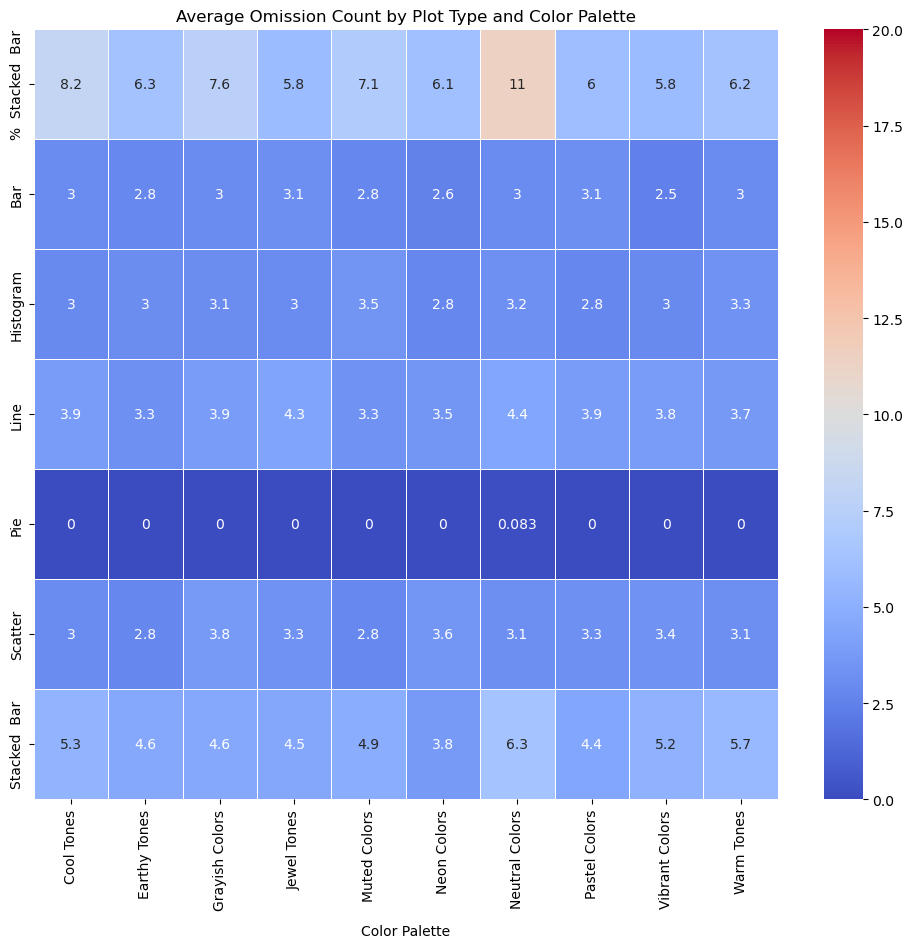

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap: Omission Rates across Plot Type & Question Type
pivot_table = omission_plot_type_and_color.pivot_table(values="omit_count", index="type_of_plot", columns="color_type", aggfunc=np.mean)
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", linewidths=0.5, vmin=0, vmax=20)
plt.title("Average Omission Count by Plot Type and Color Palette")
plt.ylabel("", labelpad=10)
plt.xlabel("Color Palette", labelpad=10)
plt.savefig("test.pdf", dpi=600, pad_inches=0.5)
#plt.subplots_adjust(bottom=0.6)
plt.show()


In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_histograms_by_plot_type(df, column_name, row_num,output_path):
    # Get unique plot types and determine grid size
    plot_types = df[column_name].unique()
    num_plots = len(plot_types)

    # Define grid size (3 rows, 3 columns)
    rows, cols = row_num, 3
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 8), sharey=True)

    # Define custom x-axis tick locations
    custom_ticks = [0, 2, 5, 8, 10, 12, 15, 18, 20]

    # Flatten axes array for easier iteration
    axes = axes.flatten()

    # Plot each histogram in the grid
    for i, plot_type in enumerate(plot_types):
        subset = df[df[column_name] == plot_type]
        # Histogram
        bins=np.arange(-0.5, 21.5, 1)
        sns.histplot(subset["omit_count"], bins=bins, color="skyblue", edgecolor="black", ax=axes[i])
        
        # Calculate mean and median
        mean_value = np.mean(subset["omit_count"])
        median_value = np.median(subset["omit_count"])

        # Add mean line
        axes[i].axvline(mean_value, color="red", linestyle="--", linewidth=2, label="Mean")

        # Add median line
        axes[i].axvline(median_value, color="green", linestyle="-.", linewidth=2, label="Median")

        # Add subtle rug plot (less pronounced ticks)
        sns.rugplot(subset["omit_count"], height=0.02, color="gray", alpha=0.5, ax=axes[i])

        # Set custom x-axis ticks
        axes[i].set_xticks(custom_ticks)

        # Labels
        axes[i].set_title(plot_type)
        axes[i].set_xlabel("Ommited Answers Count (out of 20)")
        axes[i].set_ylabel("Number of questions")
        axes[i].legend()

    # Hide any unused subplots (if there are fewer than 9 plot types)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Add a general title
    plt.suptitle("Distribution of Omission Counts Across Title Types", fontsize=16, fontweight="bold")

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.savefig(output_path)
    plt.show()


In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_histograms_by_plot_type(df, column_name, row_num, output_path):
    # Define custom colors
    color_dict = {
        "Line": "orange",
        "Bar": "steelblue",
        "Pie": "deeppink",
        "Scatter": "chartreuse",
        "Stacked Bar": "#007BA7",  # Cerulean
        "Percentual Stacked Bar": "gold",
        "Histogram": "olive"
    }

    # Get unique plot types
    plot_types = df[column_name].unique()
    num_plots = len(plot_types)

    # Define grid size
    rows, cols = row_num, 3
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 8), sharey=True)
    axes = axes.flatten()

    # Define custom x-axis tick locations
    custom_ticks = [0, 2, 5, 8, 10, 12, 15, 18, 20]

    # Store legend handles
    legend_handles = []

    # Plot each histogram
    for i, plot_type in enumerate(plot_types):
        subset = df[df[column_name] == plot_type]
        bins = np.arange(-0.5, 21.5, 1)

        color = color_dict.get(plot_type, "skyblue")

        sns.histplot(subset["omit_count"], bins=bins, color=color, edgecolor=None, ax=axes[i])

        mean_value = np.mean(subset["omit_count"])
        median_value = np.median(subset["omit_count"])

        mean_line = axes[i].axvline(mean_value, color="darkorange", linestyle="--", linewidth=2, label="Mean")
        median_line = axes[i].axvline(median_value, color="royalblue", linestyle="-.", linewidth=2, label="Median")

        axes[i].set_xticks(custom_ticks)
        axes[i].set_title(plot_type)
        axes[i].set_xlabel("Omitted Answers Count (out of 20)")
        axes[i].set_ylabel("Number of Questions")

        # Set y-axis limit
        axes[i].set_ylim(0, 200)

        # Remove subplot borders
        for spine in ["top", "right", "left", "bottom"]:
            axes[i].spines[spine].set_visible(False)

        if i == 0:
            legend_handles.extend([mean_line, median_line])

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle("Distribution of Omitted Answers Across Title Types", fontsize=16, fontweight="bold")
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Add shared legend outside the plot
    fig.legend(handles=legend_handles, loc="upper right", frameon=True, framealpha=0.8, edgecolor="black", fontsize=12, bbox_to_anchor=(1.1, 1))

    plt.savefig(output_path)
    plt.show()


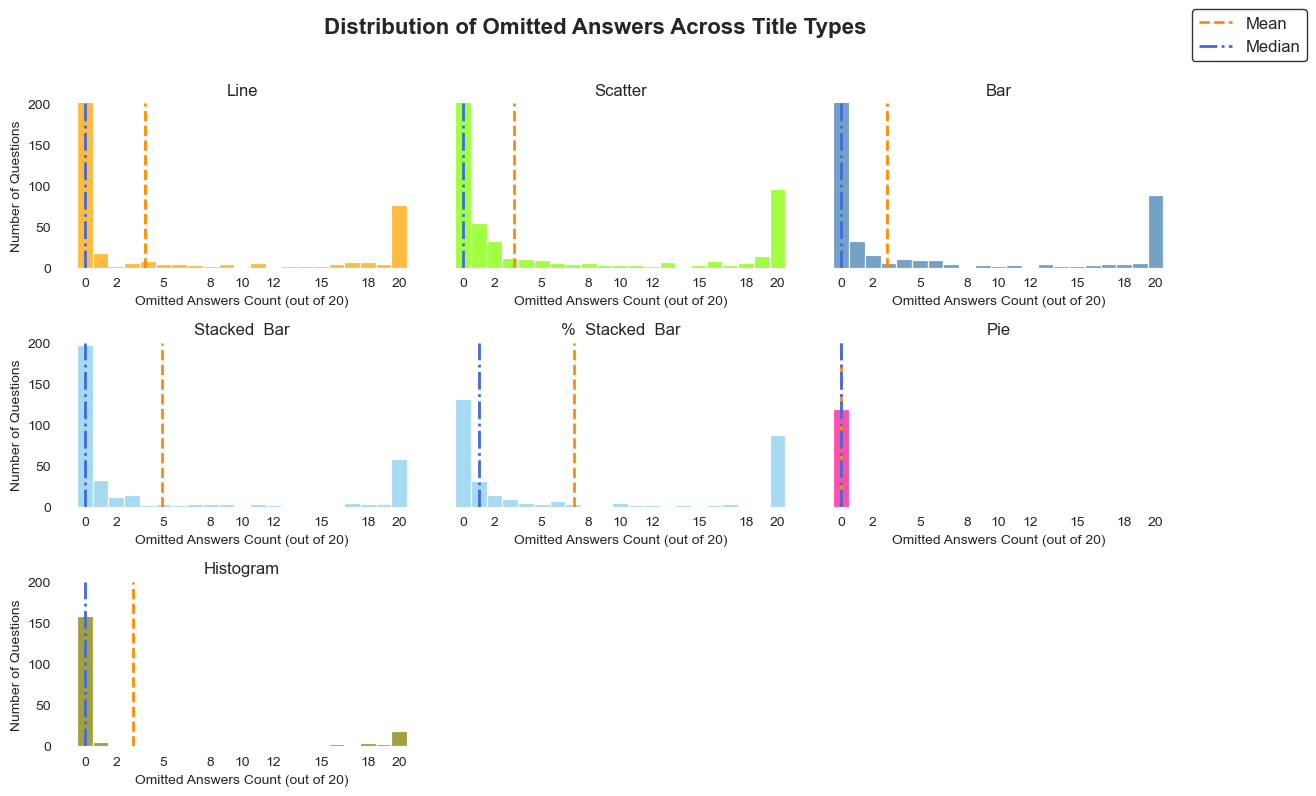

In [123]:
plot_histograms_by_plot_type(omission_plot_type_and_color, "type_of_plot", 3, "coolpics/omission1.svg")

forgot to create dummies for question type

In [13]:
def create_dummies_for_columns(df, columns):
    """
    Creates dummy variables for specified columns in a Pandas DataFrame.

    Args:
      df: The Pandas DataFrame.
      columns: A list of column names to create dummies for.

    Returns:
      The DataFrame with dummy variables added, and original columns removed.
    """
    for col in columns:
        dummies = pd.get_dummies(df[col], prefix=col)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(col, axis=1)  # Remove the original column
    return df


so here i will intercept cleaner_results and make the replacements with the test8 amelia values - they have the same columns at this point

In [17]:
# getting the stuff out of cleaner_results
#checking size
len(cleaner_results[cleaner_results["dataset"] == "stacked_area_data.csv"]) #800
len(cleaner_results) #3440
#taking it out should result in 3440 - 800
cleaner_results2 = cleaner_results[cleaner_results["dataset"] != "stacked_area_data.csv"]
len(cleaner_results2) #3440 - 800 = 2640

2640

In [18]:
#now we get the ones to input
input_fix_dataset = pd.read_csv("finalRESULTSDATASETS/amelia_answers_test8.csv")

'''missings = []
for i in cleaner_results2.columns:
    if(i not in input_fix_dataset.columns):
        print(i)'''

#dataset and google_model are not there
input_fix_dataset["google_model"] = 1 - input_fix_dataset["openai_model"]
input_fix_dataset["dataset"] = input_fix_dataset["dataset_x"]
input_fix_dataset
input_fix_dataset.drop(['Unnamed: 0.1', 'Unnamed: 0', 'dataset_x', 'question_x',"dataset_y",
                        'gpt_answer_1', 'gpt_answer_2', 'gpt_answer_3',
       'gpt_answer_4', 'gpt_answer_5', 'gpt_answer_6', 'gpt_answer_7',
       'gpt_answer_8', 'gpt_answer_9', 'gpt_answer_10', 'gpt_answer_11',
       'gpt_answer_12', 'gpt_answer_13', 'gpt_answer_14', 'gpt_answer_15',
       'gpt_answer_16', 'gpt_answer_17', 'gpt_answer_18', 'gpt_answer_19',
       'gpt_answer_20', "answer", "title", "question_y", "image", "normal_title"], axis=1, inplace=True)  

In [19]:
cleaner_results_inputted = pd.concat([input_fix_dataset, cleaner_results2], ignore_index=True)

In [20]:
#lemme export this so i can use it in the transformational analysis
cleaner_results_inputted.to_csv("transformation_analysis/cleaner_results_inputed.csv")

just testing it back

In [18]:
cleaner_results_inputted = pd.read_csv("transformation_analysis/cleaner_results_inputed.csv")

In [14]:
clean_results_all_dummy_test = create_dummies_for_columns(cleaner_results_inputed_test, ["question_type"]) #and we use this for results
len(clean_results_all_dummy_test)#3440 before, now 3240 cause of the little error with the plots that were repeated with the name of bar

3240

In [50]:
clean_results_all_dummy_test.to_csv("additional_materials/regular_results_datasets_with_all_dummies.csv")

In [19]:
clean_results_all_dummy = create_dummies_for_columns(cleaner_results_inputted, ["question_type"]) #and we use this for results
len(clean_results_all_dummy)#3440 before, now 3240 cause of the little error with the plots that were repeated with the name of bar

3240

i need a slightly better dataframe to generate pretty pictures

this one is for plot type

In [20]:
#this cell just creates a plot_types_for_df

def subset_the_df(df,filtered_columns, columns_to_be_compacted, new_column ):
    #filter the columns and create a new column via idxmax
    intermediate_plot = df[filtered_columns]
    intermediate_plot[new_column] = intermediate_plot[columns_to_be_compacted].idxmax(axis=1)

    #drop all the columns we compacted, we dont need them anymore
    final_plot =intermediate_plot.drop(['plot_type_bar', 'plot_type_hist', 'plot_type_line', 'plot_type_pie',
       'plot_type_scatter', 'plot_type_stacked_bar',
       'plot_type_stacked_bar_100'], axis=1)
    return final_plot


In [21]:
#so i will apply the idxmax to revert some of the binary columns back to a single column
plot_type_for_plots_df = clean_results_all_dummy[["correct_count", 'plot_type_bar', 'plot_type_hist', 'plot_type_line', 'plot_type_pie',
       'plot_type_scatter', 'plot_type_stacked_bar',
       'plot_type_stacked_bar_100']]
#ill change the correct count for out of 100
#plot_type_for_plots_df["correct_count"] = (plot_type_for_plots_df["correct_count"]/20)*100


In [22]:
#apply idxmax to turn it back into 2 columns, the correct count and the type
plot_type_for_plots_df["plot_type"] = plot_type_for_plots_df[['plot_type_bar', 'plot_type_hist', 'plot_type_line', 'plot_type_pie',
       'plot_type_scatter', 'plot_type_stacked_bar',
       'plot_type_stacked_bar_100']].idxmax(axis=1)

plot_type_for_plots_df =plot_type_for_plots_df.drop(['plot_type_bar', 'plot_type_hist', 'plot_type_line', 'plot_type_pie',
       'plot_type_scatter', 'plot_type_stacked_bar',
       'plot_type_stacked_bar_100'], axis=1)

C:\Users\matheus\AppData\Local\Temp\ipykernel_100156\36827790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_type_for_plots_df["plot_type"] = plot_type_for_plots_df[['plot_type_bar', 'plot_type_hist', 'plot_type_line', 'plot_type_pie',


In [23]:
plot_type_for_plots_df

,correct_count,plot_type
0,0,plot_type_line
1,20,plot_type_line
2,20,plot_type_line
3,20,plot_type_line
4,20,plot_type_line
...,...,...
3235,0,plot_type_bar
3236,3,plot_type_bar
3237,0,plot_type_bar
3238,5,plot_type_bar


In [24]:
plot_type_for_plots_df["plot_type"] = (
    plot_type_for_plots_df["plot_type"]
    .str.replace("plot_type_", "")
    .str.replace("stacked_bar_100", "percentual_stacked_bar")
    .str.replace("_", "  ")  # Replace underscores with spaces
    .str.title()  # Capitalize first letter of each word
    .str.replace("Hist", "Histogram")
      # Rename specific plot type
)

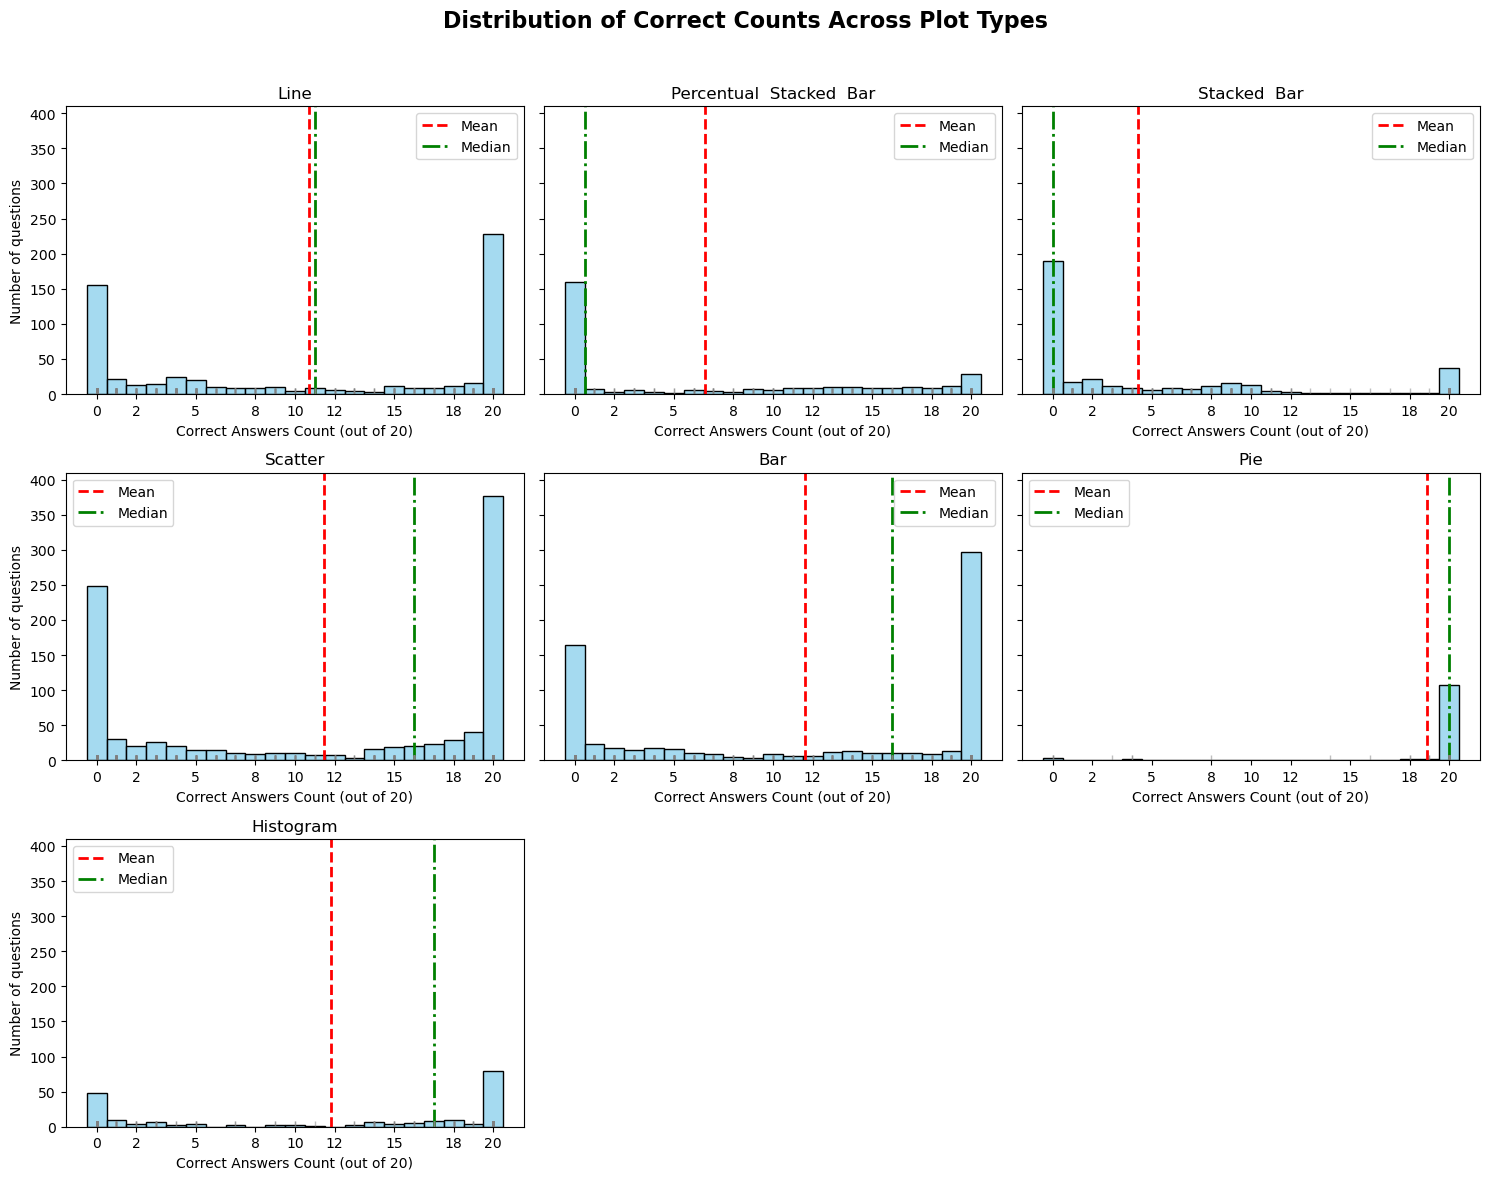

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get unique plot types and determine grid size
plot_types = plot_type_for_plots_df["plot_type"].unique()
num_plots = len(plot_types)

# Define grid size (3 rows, 3 columns)
rows, cols = 3, 3
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 12), sharey=True)

# Define custom x-axis tick locations
custom_ticks = [0, 2, 5, 8, 10, 12, 15, 18, 20]

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot each histogram in the grid
for i, plot_type in enumerate(plot_types):
    subset = plot_type_for_plots_df[plot_type_for_plots_df["plot_type"] == plot_type]
    
    # Histogram
    bins=np.arange(-0.5, 21.5, 1)
    sns.histplot(subset["correct_count"], bins=bins, color="skyblue", edgecolor="black", ax=axes[i])

    # Calculate mean and median
    mean_value = np.mean(subset["correct_count"])
    median_value = np.median(subset["correct_count"])

    # Add mean line
    axes[i].axvline(mean_value, color="red", linestyle="--", linewidth=2, label="Mean")

    # Add median line
    axes[i].axvline(median_value, color="green", linestyle="-.", linewidth=2, label="Median")

    # Add subtle rug plot (less pronounced ticks)
    sns.rugplot(subset["correct_count"], height=0.02, color="gray", alpha=0.5, ax=axes[i])

    # Set custom x-axis ticks
    axes[i].set_xticks(custom_ticks)

    # Labels
    axes[i].set_title(plot_type)
    axes[i].set_xlabel("Correct Answers Count (out of 20)")
    axes[i].set_ylabel("Number of questions")
    axes[i].legend()

# Hide any unused subplots (if there are fewer than 9 plot types)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a general title
plt.suptitle("Distribution of Correct Counts Across Plot Types", fontsize=16, fontweight="bold")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.savefig("plot_type_hists.svg")
plt.show()



Now one for dataset for colors

In [26]:
#now lastly(i believe) for the title i think
title_type_for_plots_df = clean_results_all_dummy[["correct_count", 'referential_title']]

#apply idxmax to turn it back into 2 columns, the correct count and the type
title_type_for_plots_df['title_type'] = title_type_for_plots_df['referential_title'].apply(lambda x: "Referential Title" if x == 1 else "Normal Title")
title_type_for_plots_df.drop("referential_title", axis=1)
'''
title_type_for_plots_df["title_type"] = (
    color_type_for_plots_df["color"]
    .str.replace("color_", "")
)'''

C:\Users\matheus\AppData\Local\Temp\ipykernel_100156\858615932.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_type_for_plots_df['title_type'] = title_type_for_plots_df['referential_title'].apply(lambda x: "Referential Title" if x == 1 else "Normal Title")


'\ntitle_type_for_plots_df["title_type"] = (\n    color_type_for_plots_df["color"]\n    .str.replace("color_", "")\n)'

In [27]:
title_type_for_plots_df[title_type_for_plots_df["title_type"] == "Normal Title"]

,correct_count,referential_title,title_type
10,15,0,Normal Title
11,20,0,Normal Title
12,20,0,Normal Title
13,20,0,Normal Title
14,20,0,Normal Title
...,...,...,...
3235,0,0,Normal Title
3236,3,0,Normal Title
3237,0,0,Normal Title
3238,5,0,Normal Title


In [ ]:
#apply the function


In [28]:
#so i will apply the idxmax to revert some of the binary columns back to a single column
color_type_for_plots_df = clean_results_all_dummy[["correct_count", 'color_black',
       'color_burlywood', 'color_chartreuse', 'color_lightgray',
       'color_lightpink', 'color_mediumvioletred', 'color_navy', 'color_red',
       'color_saddlebrown', 'color_tomato']]
#ill change the correct count for out of 100
#plot_type_for_plots_df["correct_count"] = (plot_type_for_plots_df["correct_count"]/20)*100


In [29]:
#apply idxmax to turn it back into 2 columns, the correct count and the type
color_type_for_plots_df["color"] = color_type_for_plots_df[['color_black',
       'color_burlywood', 'color_chartreuse', 'color_lightgray',
       'color_lightpink', 'color_mediumvioletred', 'color_navy', 'color_red',
       'color_saddlebrown', 'color_tomato']].idxmax(axis=1)

color_type_for_plots_df =color_type_for_plots_df.drop(['color_black',
       'color_burlywood', 'color_chartreuse', 'color_lightgray',
       'color_lightpink', 'color_mediumvioletred', 'color_navy', 'color_red',
       'color_saddlebrown', 'color_tomato'], axis=1)

color_type_for_plots_df["color"] = (
    color_type_for_plots_df["color"]
    .str.replace("color_", "")
)

C:\Users\matheus\AppData\Local\Temp\ipykernel_100156\592058206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  color_type_for_plots_df["color"] = color_type_for_plots_df[['color_black',


In [30]:


#now ill just make it more readable
color_sets = {
    "red": "Vibrant Colors",
    "saddlebrown": "Earthy Tones",
    "lightgray": "Grayish Colors",
    "lightpink": "Pastel Colors",
    "navy": "Cool Tones",
    "tomato": "Warm Tones",
    "black": "Neutral Colors",
    "mediumvioletred": "Jewel Tones",
    "chartreuse": "Neon Colors",
    "burlywood": "Muted Colors"
}

color_type_for_plots_df["color"] =  color_type_for_plots_df["color"].map(color_sets)

In [31]:
color_type_for_plots_df["color"].unique()

array(['Neutral Colors', 'Muted Colors', 'Neon Colors', 'Grayish Colors',
       'Pastel Colors', 'Jewel Tones', 'Cool Tones', 'Vibrant Colors',
       'Earthy Tones', 'Warm Tones'], dtype=object)

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_histograms_by_plot_type(df, column_name, row_num,output_path):
    # Get unique plot types and determine grid size
    plot_types = df[column_name].unique()
    num_plots = len(plot_types)

    # Define grid size (3 rows, 3 columns)
    rows, cols = row_num, 2
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 5), sharey=True)

    # Define custom x-axis tick locations
    custom_ticks = [0, 2, 5, 8, 10, 12, 15, 18, 20]

    # Flatten axes array for easier iteration
    axes = axes.flatten()

    # Plot each histogram in the grid
    for i, plot_type in enumerate(plot_types):
        subset = df[df[column_name] == plot_type]
        # Histogram
        bins=np.arange(-0.5, 21.5, 1)
        sns.histplot(subset["correct_count"], bins=bins, color="skyblue", edgecolor="black", ax=axes[i])

        # Calculate mean and median
        mean_value = np.mean(subset["correct_count"])
        median_value = np.median(subset["correct_count"])

        # Add mean line
        axes[i].axvline(mean_value, color="red", linestyle="--", linewidth=2, label="Mean")

        # Add median line
        axes[i].axvline(median_value, color="green", linestyle="-.", linewidth=2, label="Median")

        # Add subtle rug plot (less pronounced ticks)
        sns.rugplot(subset["correct_count"], height=0.02, color="gray", alpha=0.5, ax=axes[i])

        # Set custom x-axis ticks
        axes[i].set_xticks(custom_ticks)

        # Labels
        axes[i].set_title(plot_type)
        axes[i].set_xlabel("Correct Answers Count (out of 20)")
        axes[i].set_ylabel("Number of questions")
        axes[i].legend()

    # Hide any unused subplots (if there are fewer than 9 plot types)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Add a general title
    plt.suptitle("Distribution of Correct Counts Across Title Types", fontsize=16, fontweight="bold")

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.savefig(output_path)
    plt.show()


In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_histograms_by_plot_type(df, column_name, row_num, col_num, output_path, title, color_dict=None):
    plot_types = df[column_name].unique()
    num_plots = len(plot_types)
    
    rows, cols = row_num, col_num
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 8), sharey=True) #12, 8 for colors and plot types
    axes = axes.flatten()
    
    custom_ticks = [0, 2, 5, 8, 10, 12, 15, 18, 20]
    
    # Default colors if none provided
    default_colors = sns.color_palette("husl", num_plots)
    color_dict = color_dict or {ptype: default_colors[i] for i, ptype in enumerate(plot_types)}
    
    # Store legend handles
    legend_handles = []
    
    for i, plot_type in enumerate(plot_types):
        subset = df[df[column_name] == plot_type]
        bins = np.arange(-0.5, 21.5, 1)
        
        color = color_dict.get(plot_type, "skyblue")
        
        sns.histplot(subset["correct_count"], bins=bins, color=color, edgecolor=None, ax=axes[i])
        
        mean_value = np.mean(subset["correct_count"])
        median_value = np.median(subset["correct_count"])
        
        mean_line = axes[i].axvline(mean_value, color="darkorange", linestyle="--", linewidth=2, label="Mean")
        median_line = axes[i].axvline(median_value, color="royalblue", linestyle="-.", linewidth=2, label="Median")
        
        axes[i].set_xticks(custom_ticks)
        axes[i].set_title(plot_type)
        axes[i].set_xlabel("Correct Answers Count (out of 20)")
        axes[i].set_ylabel("Number of questions")
        
        # Set y-axis limit
        axes[i].set_ylim(0, 200)
        
        # Remove subplot borders (no box around each histogram)
        for spine in ["top", "right", "left", "bottom"]:
            axes[i].spines[spine].set_visible(False)
        
        if i == 0:  # Only add legend elements once
            legend_handles.extend([mean_line, median_line])
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.suptitle(title, fontsize=16, fontweight="bold")
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Improved legend placement
    fig.legend(handles=legend_handles, loc="upper right", frameon=True, framealpha=0.8, edgecolor="black", fontsize=12, bbox_to_anchor=(1.1, 1))
    
    plt.savefig(output_path)
    plt.show()


In [60]:
del(plot_histograms_by_plot_type)

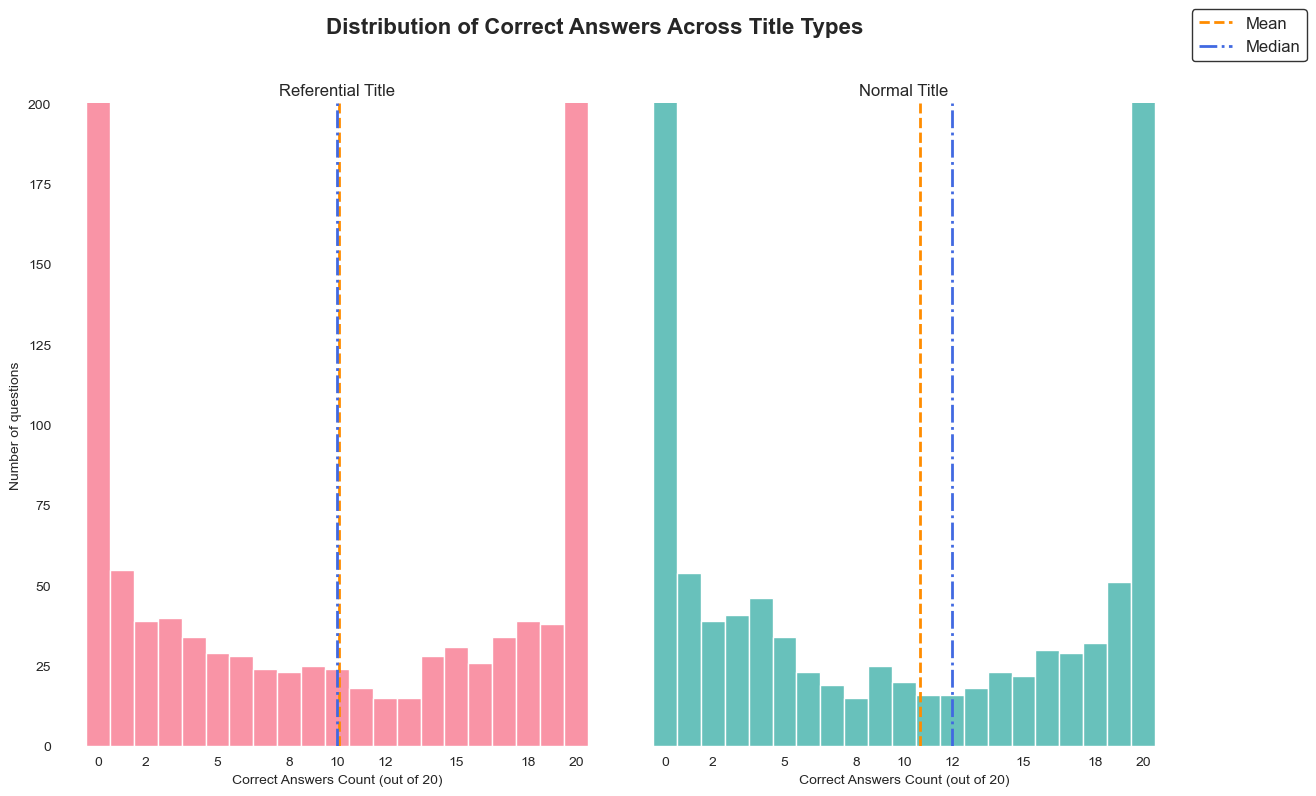

In [134]:
plot_histograms_by_plot_type(title_type_for_plots_df, "title_type", 1,2, "coolpics/title_hist.svg", "Distribution of Correct Answers Across Title Types")

In [105]:
omission_plot_type_and_color

,omit_count,question_type,type_of_plot,color_type
0,0,Retrieve Value,Line,Vibrant Colors
1,7,Retrieve Value,Line,Vibrant Colors
2,0,Retrieve Value,Line,Earthy Tones
3,9,Retrieve Value,Line,Earthy Tones
4,0,Retrieve Value,Line,Grayish Colors
...,...,...,...,...
3435,3,Make Comparisons,% Stacked Bar,Jewel Tones
3436,0,Make Comparisons,% Stacked Bar,Neon Colors
3437,10,Make Comparisons,% Stacked Bar,Neon Colors
3438,0,Make Comparisons,% Stacked Bar,Muted Colors


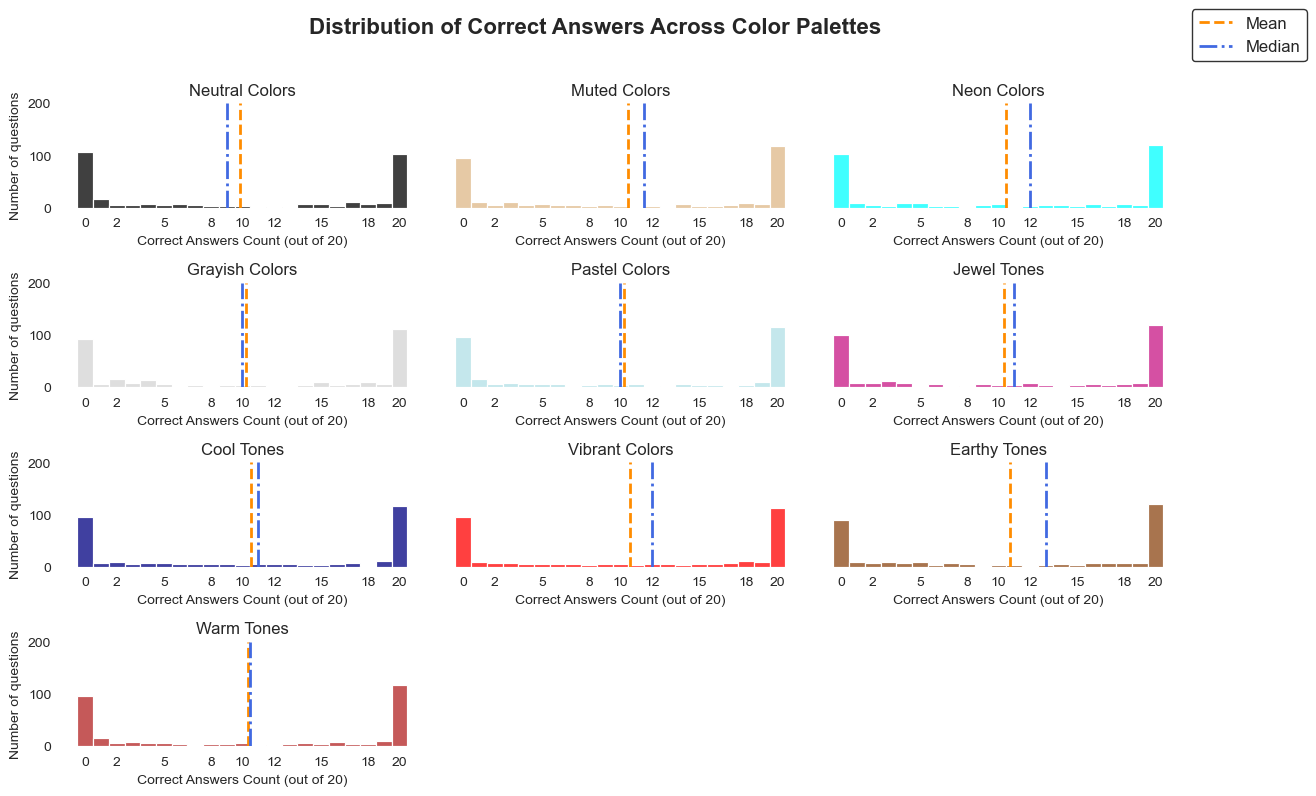

In [142]:
plot_histograms_by_plot_type(color_type_for_plots_df, "color", 4, 3, title = "Distribution of Correct Answers Across Color Palettes",output_path= "coolpics/hist_colors_final.svg",
                             color_dict = {
    "Neutral Colors": "black",
    "Muted Colors": "burlywood",
    "Neon Colors": "aqua",
    "Grayish Colors": "lightgray",
    "Pastel Colors": "powderblue",  # Cerulean in hex
    "Jewel Tones": "mediumvioletred",
    "Cool Tones": "navy",
    "Vibrant Colors": "red",
    "Earthy Tones": "saddlebrown",
    "Warm Tones": "firebrick"
})

In [125]:
plot_histograms_by_plot_type(color_type_for_plots_df, "color", 4, 3, title = "Distribution of Correct Answers Across Color Palettes",output_path= "coolpics/hist_colors.svg")

TypeError: plot_histograms_by_plot_type() got an unexpected keyword argument 'title'

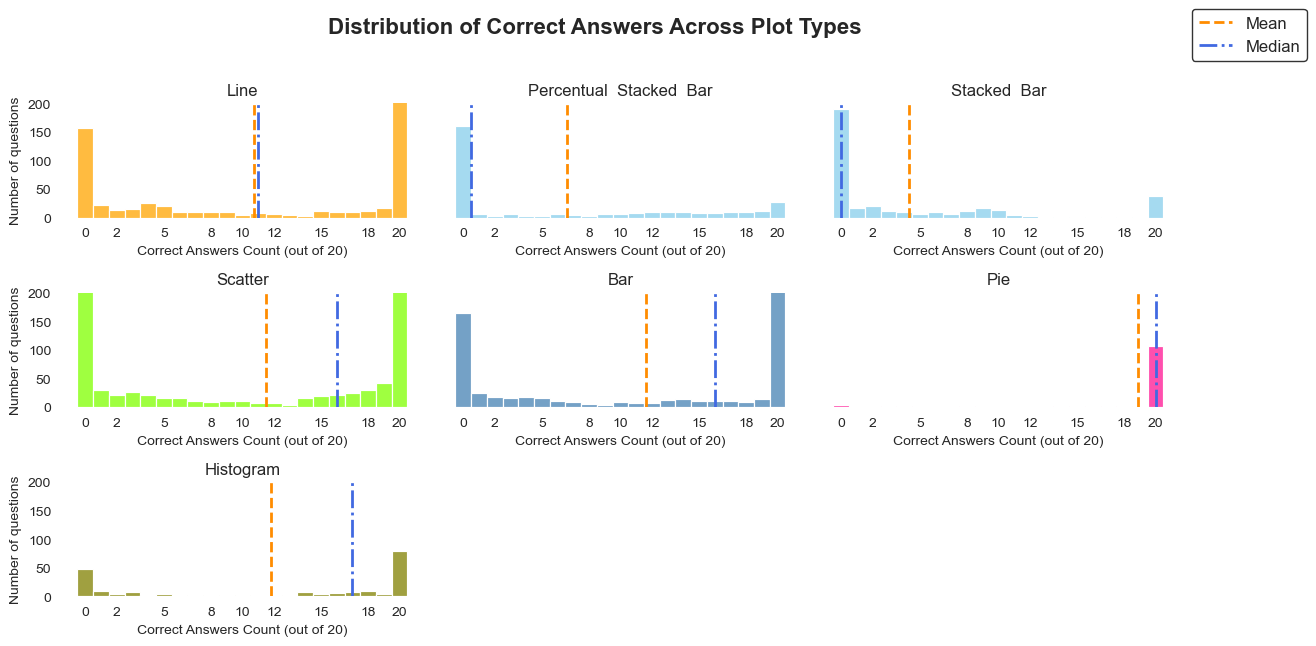

In [96]:
plot_histograms_by_plot_type(plot_type_for_plots_df, "plot_type", 4, 3, title= "Distribution of Correct Answers Across Plot Types",output_path= "coolpics/hist_pts.svg",
                             color_dict = {
    "Line": "orange",
    "Bar": "steelblue",
    "Pie": "deeppink",
    "Scatter": "chartreuse",
    "Stacked Bar": "#007BA7",  # Cerulean in hex
    "Percentual Stacked Bar": "gold",
    "Histogram": "olive"
})

modelling

In [33]:
clean_results_all_dummy[clean_results_all_dummy["question_type_Find Extremum"] == 1]

,Unnamed: 0,question_lowered_nospace,openai_model,referential_title,dataset_100_stacked_bar_data.csv,dataset_area_data.csv,dataset_bar_data.csv,dataset_histogram_data.csv,dataset_line_data.csv,dataset_pie_data.csv,...,dataset,question_type_Characterize Distribution,question_type_Determine Range,question_type_Find Anomalies,question_type_Find Clusters,question_type_Find Correlations/Trends,question_type_Find Extremum,question_type_Identify the Characteristic of Bins,question_type_Make Comparisons,question_type_Retrieve Value
240,240,"overthecourseofyearsbetween2009and2014,whenwas...",0,1,False,False,False,False,False,False,...,stacked_area_data.csv,False,False,False,False,False,True,False,False,False
241,241,"overthecourseofyearsbetween2009and2014,whenwas...",0,1,False,False,False,False,False,False,...,stacked_area_data.csv,False,False,False,False,False,True,False,False,False
242,242,"overthecourseofyearsbetween2009and2014,whenwas...",0,1,False,False,False,False,False,False,...,stacked_area_data.csv,False,False,False,False,False,True,False,False,False
243,243,"overthecourseofyearsbetween2009and2014,whenwas...",0,1,False,False,False,False,False,False,...,stacked_area_data.csv,False,False,False,False,False,True,False,False,False
244,244,"overthecourseofyearsbetween2009and2014,whenwas...",0,1,False,False,False,False,False,False,...,stacked_area_data.csv,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,2875,whenwastheaveragepriceofapoundofcoffeebeansatm...,0,0,False,True,False,False,False,False,...,area_data.csv,False,False,False,False,False,True,False,False,False
2876,2876,whenwastheaveragepriceofapoundofcoffeebeansatm...,1,0,False,True,False,False,False,False,...,area_data.csv,False,False,False,False,False,True,False,False,False
2877,2877,whenwastheaveragepriceofapoundofcoffeebeansatm...,0,0,False,True,False,False,False,False,...,area_data.csv,False,False,False,False,False,True,False,False,False
2878,2878,whenwastheaveragepriceofapoundofcoffeebeansatm...,1,0,False,True,False,False,False,False,...,area_data.csv,False,False,False,False,False,True,False,False,False


In [34]:
clean_results_all_dummy.columns

Index(['Unnamed: 0', 'question_lowered_nospace', 'openai_model',
       'referential_title', 'dataset_100_stacked_bar_data.csv',
       'dataset_area_data.csv', 'dataset_bar_data.csv',
       'dataset_histogram_data.csv', 'dataset_line_data.csv',
       'dataset_pie_data.csv', 'dataset_scatterplot_data.csv',
       'dataset_stacked_area_data.csv', 'dataset_stacked_bar_data.csv',
       'plot_type_bar', 'plot_type_hist', 'plot_type_line', 'plot_type_pie',
       'plot_type_scatter', 'plot_type_stacked_bar',
       'plot_type_stacked_bar_100', 'color_black', 'color_burlywood',
       'color_chartreuse', 'color_lightgray', 'color_lightpink',
       'color_mediumvioletred', 'color_navy', 'color_red', 'color_saddlebrown',
       'color_tomato', 'correct_count', 'omit_count', 'google_model',
       'dataset', 'question_type_Characterize Distribution',
       'question_type_Determine Range', 'question_type_Find Anomalies',
       'question_type_Find Clusters', 'question_type_Find Correlations

effects coding attempt! lets go!

In [35]:
def extract_after_effects(s):
    return s.split("effects_")[-1] if "effects_" in s else None

In [36]:
#first ill recreate the dummy variables! per category

#category: plot type
def apply_effects_coding(df, categorical_columns, baseline):
    """
    Converts categorical variables to effects coding.
    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - categorical_columns (list): List of column names to transform.
    - baseline_dict (dict): Dictionary mapping column names to their baseline category.
    Returns:
    - pd.DataFrame: DataFrame with effects-coded variables.
    """
    #df_transformed = df.copy()
    effects_variables = []
    #but these categorical_columns must be only the others, cause effects should exist only for others
    categorical_columns.remove(baseline)
    for col in categorical_columns:
        #gen a new col name
        newcol = "effect_"+col
        #new list
        effects_variables.append(newcol)
    
    combined = [[x, y] for x, y in zip(categorical_columns, effects_variables)]
    
    #create a range of new columns
    for pairofcols in combined:
        newcol = pairofcols[1]
        oldcol = pairofcols[0]
        df[newcol] = df[oldcol].copy()  # Start with original values
        df.loc[df[baseline] == 1, newcol] = -1  # Apply condition

    return df

In [37]:
clean_results_all_dummy["openai_model"][0]

0

In [38]:
# Check for non-binary values
#print(clean_results_all_dummy["openai_model"].unique())

# Check for tuple elements
print(clean_results_all_dummy[clean_results_all_dummy["openai_model"].apply(type) == tuple])

Empty DataFrame
Columns: [Unnamed: 0, question_lowered_nospace, openai_model, referential_title, dataset_100_stacked_bar_data.csv, dataset_area_data.csv, dataset_bar_data.csv, dataset_histogram_data.csv, dataset_line_data.csv, dataset_pie_data.csv, dataset_scatterplot_data.csv, dataset_stacked_area_data.csv, dataset_stacked_bar_data.csv, plot_type_bar, plot_type_hist, plot_type_line, plot_type_pie, plot_type_scatter, plot_type_stacked_bar, plot_type_stacked_bar_100, color_black, color_burlywood, color_chartreuse, color_lightgray, color_lightpink, color_mediumvioletred, color_navy, color_red, color_saddlebrown, color_tomato, correct_count, omit_count, google_model, dataset, question_type_Characterize Distribution, question_type_Determine Range, question_type_Find Anomalies, question_type_Find Clusters, question_type_Find Correlations/Trends, question_type_Find Extremum, question_type_Identify the Characteristic of Bins, question_type_Make Comparisons, question_type_Retrieve Value]
Index

In [39]:
#first category the plot type
df1 = apply_effects_coding(clean_results_all_dummy,['plot_type_bar', 'plot_type_hist',
       'plot_type_line', 'plot_type_pie', 'plot_type_scatter',
       'plot_type_stacked_bar', 'plot_type_stacked_bar_100'],'plot_type_bar' )

#then datasets
df2 = apply_effects_coding(df1,['dataset_100_stacked_bar_data.csv', 'dataset_area_data.csv',
       'dataset_bar_data.csv', 'dataset_histogram_data.csv',
       'dataset_line_data.csv', 'dataset_pie_data.csv',
       'dataset_scatterplot_data.csv', 'dataset_stacked_area_data.csv',
       'dataset_stacked_bar_data.csv'],'dataset_bar_data.csv' )

#then colors
df3 = apply_effects_coding(df2,['color_black',
       'color_burlywood', 'color_chartreuse', 'color_lightgray',
       'color_lightpink', 'color_mediumvioletred', 'color_navy', 'color_red',
       'color_saddlebrown', 'color_tomato',],'color_navy' )

#then question types
df4 = apply_effects_coding(df3,['question_type_Characterize Distribution',
       'question_type_Determine Range', 'question_type_Find Anomalies',
       'question_type_Find Clusters', 'question_type_Find Correlations/Trends',
       'question_type_Find Extremum',
       'question_type_Identify the Characteristic of Bins',
       'question_type_Make Comparisons', 'question_type_Retrieve Value'],'question_type_Find Extremum' )

#title type and model are switched from 0 to -1
df4["effects_openai_model"] = df3["openai_model"].replace({0: -1, 1: 1})
df4["effects_referential_title"] = df3["referential_title"].replace({0: -1, 1: 1})
#df4["effects_openai_model"] = df3["openai_model"].apply(lambda x: -1 if x==0 else x) 
#df4["effects_referential_title"] = df3["openai_model"].apply(lambda x: -1 if x==0 else x) 

#ill change the name of the correct and omit count just to get rid of all the rest
df4["effects_correct_count"] = df4['correct_count']
df4["effects_omit_count"] = df4['omit_count']



C:\Users\matheus\AppData\Local\Temp\ipykernel_100156\121696430.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df[baseline] == 1, newcol] = -1  # Apply condition
C:\Users\matheus\AppData\Local\Temp\ipykernel_100156\121696430.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df[baseline] == 1, newcol] = -1  # Apply condition
C:\Users\matheus\AppData\Local\Temp\ipykernel_100156\121696430.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df[baseline] == 1, newcol] = -1  # Ap

Now we get REGRESSIONS

In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
def normalize_correct_count(df, column_to_normalize,method='standard'):

    if column_to_normalize not in df.columns:
        raise ValueError("The DataFrame does not contain a "+ column_to_normalize +" column.")

    if method == 'standard':
        scaler = StandardScaler()
        new_col = column_to_normalize+"_normalized"
        df[new_col] = scaler.fit_transform(df[[column_to_normalize]])
    elif method == 'minmax':
        scaler = MinMaxScaler()
        df[new_col] = scaler.fit_transform(df[[column_to_normalize]])
    else:
        raise ValueError("Invalid normalization method. Choose 'standard' or 'minmax'.")
    
    df =df.drop(column_to_normalize, axis=1)
    return df

In [41]:
import statsmodels.api as sm
def perform_ols_and_extract_stats(model_df, target_variable='correct_count_normalized'):
    """
    Performs OLS and extracts coefficients, p-values, and standard deviations for plot type and interaction variables.
    """
    try:
        # Convert object columns to numeric
        for col in model_df.columns:
            if model_df[col].dtype == 'object':
                model_df[col] = pd.to_numeric(model_df[col], errors='coerce')

        # Drop rows with NaN
        model_df.dropna(inplace=True)

        y = model_df[target_variable]
        X = model_df.drop(target_variable, axis=1)
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        
        # Extract relevant coefficients, p-values, and standard deviations
        relevant_vars = [col for col in model.params.index if col.startswith("plot_type") or col.startswith("interaction")]
        results_df = pd.DataFrame({
            'Coefficient': model.params.round(2),
            'P-Value': model.pvalues.round(2),
            'Std Dev': model.bse.round(2)
        })
        
        return results_df
    
    except KeyError:
        print(f"Error: Target variable '{target_variable}' not found in DataFrame.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [42]:
#!pip install statsmodels

import pandas as pd
import statsmodels.api as sm


def perform_ols_and_show_significant_variables(model_df, target_variable='correct_count_normalized'):
    """
    Performs OLS and handles potential non-numeric data.
    """
    try:
        # Convert object columns to numeric
        for col in model_df.columns:
            if model_df[col].dtype == 'object':
                model_df[col] = pd.to_numeric(model_df[col], errors='coerce')

        # Drop rows with NaN
        model_df.dropna(inplace=True)

        y = model_df[target_variable]
        X = model_df.drop(target_variable, axis=1)
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        print(model.summary())
        significant_vars = model.pvalues[model.pvalues < 0.05].index.tolist()
        print("\nStatistically Significant Variables (p < 0.05):")
        if significant_vars:
            for var in significant_vars:
                print(f"- {var}")
        else:
            print("No statistically significant variables found.")

    except KeyError:
        print(f"Error: Target variable '{target_variable}' not found in DataFrame.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [48]:
df_effects = df4.filter(regex='^effect').astype(int)

In [49]:
df_effects["omit_count"] = df_effects["effects_omit_count"]
df_effects["correct_count"] = df_effects["effects_correct_count"]
df_effects2 = df_effects.drop(["effects_omit_count", "effects_correct_count"], axis = 1)

In [ ]:
#df_effects2.to_csv("additional_materials/effects_applied_used_dataset.csv")

In [ ]:
#for submission


In [383]:
df_effects_correct = normalize_correct_count(df_effects2, "correct_count")
df_effects_correct.drop(["omit_count", "omit_count_normalized" ], axis = 1, inplace = True)
df_effects_omission = normalize_correct_count(df_effects2, "omit_count")
df_effects_omission.drop(["correct_count","correct_count_normalized"], axis = 1, inplace = True)


c:\Users\matheus\anaconda35\envs\mylilenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\matheus\anaconda35\envs\mylilenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\matheus\anaconda35\envs\mylilenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\matheus\anaconda35\envs\mylilenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a fu

quickly creating the ones without dataset control cause its part of the result the importance of datasets

In [370]:
df_effects_omission_nodatasets = df_effects_omission.drop(['effect_dataset_100_stacked_bar_data.csv',
       'effect_dataset_area_data.csv', 'effect_dataset_histogram_data.csv',
       'effect_dataset_line_data.csv', 'effect_dataset_pie_data.csv',
       'effect_dataset_scatterplot_data.csv',
       'effect_dataset_stacked_area_data.csv',
       'effect_dataset_stacked_bar_data.csv'], axis=1)

df_effects_correct_nodatasets = df_effects_correct.drop(['effect_dataset_100_stacked_bar_data.csv',
       'effect_dataset_area_data.csv', 'effect_dataset_histogram_data.csv',
       'effect_dataset_line_data.csv', 'effect_dataset_pie_data.csv',
       'effect_dataset_scatterplot_data.csv',
       'effect_dataset_stacked_area_data.csv',
       'effect_dataset_stacked_bar_data.csv', "omit_count_normalized"], axis=1)

lets add interactions!

In [354]:
df_effects_correct_nodatasets.columns

Index(['effect_plot_type_hist', 'effect_plot_type_line',
       'effect_plot_type_pie', 'effect_plot_type_scatter',
       'effect_plot_type_stacked_bar', 'effect_plot_type_stacked_bar_100',
       'effect_color_black', 'effect_color_burlywood',
       'effect_color_chartreuse', 'effect_color_lightgray',
       'effect_color_lightpink', 'effect_color_mediumvioletred',
       'effect_color_red', 'effect_color_saddlebrown', 'effect_color_tomato',
       'effect_question_type_Characterize Distribution',
       'effect_question_type_Determine Range',
       'effect_question_type_Find Anomalies',
       'effect_question_type_Find Clusters',
       'effect_question_type_Find Correlations/Trends',
       'effect_question_type_Identify the Characteristic of Bins',
       'effect_question_type_Make Comparisons',
       'effect_question_type_Retrieve Value', 'effects_openai_model',
       'effects_referential_title', 'correct_count_normalized'],
      dtype='object')

In [336]:
import pandas as pd

def add_effects_interactions(df, list1, list2):
    """
    Adds interaction terms between two lists of effects-coded columns to the given DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame with effects-coded columns.
    - list1 (list): First list of column names.
    - list2 (list): Second list of column names.

    Returns:
    - pd.DataFrame: Modified DataFrame with new interaction columns.
    """
    # Ensure the lists are the same length
    if len(list1) != len(list2):
        raise ValueError("Both column lists must have the same length for proper interaction terms.")
    
    # Generate and add interaction terms directly to the original DataFrame
    for col1, col2 in zip(list1, list2):  
        interaction_col = f"{col1}_X_{col2}"
        df[interaction_col] = df[col1] * df[col2]  # Element-wise multiplication
    
    return df  # Returns the updated DataFrame


In [371]:
question_type_interactions_acc =["effect_question_type_Retrieve Value",    
    "effect_question_type_Retrieve Value",
    "effect_question_type_Retrieve Value",
    "effect_question_type_Retrieve Value",
    "effect_question_type_Retrieve Value", 
    "effect_question_type_Make Comparisons",
    "effect_question_type_Make Comparisons", 
    "effect_question_type_Make Comparisons",
    "effect_question_type_Make Comparisons", 
    "effect_question_type_Make Comparisons",
    "effect_question_type_Make Comparisons", 
    "effect_question_type_Determine Range", 
    "effect_question_type_Determine Range"]
plot_type_interactions_acc= ['effect_plot_type_hist', 
    'effect_plot_type_line',
    'effect_plot_type_pie', 
    'effect_plot_type_scatter',
    'effect_plot_type_stacked_bar_100',
    'effect_plot_type_hist',
     'effect_plot_type_line',
    'effect_plot_type_pie', 
    'effect_plot_type_scatter',
    'effect_plot_type_stacked_bar',
    'effect_plot_type_stacked_bar_100',
    'effect_plot_type_line',
    'effect_plot_type_scatter']

In [372]:
question_type_interactions_omit =["effect_question_type_Retrieve Value",    
    "effect_question_type_Retrieve Value",
    "effect_question_type_Retrieve Value",
    "effect_question_type_Make Comparisons",
    "effect_question_type_Make Comparisons", 
    "effect_question_type_Make Comparisons",
    "effect_question_type_Make Comparisons", 
    "effect_question_type_Make Comparisons",
    "effect_question_type_Make Comparisons", 
    "effect_question_type_Determine Range"]
plot_type_interactions_omit= [
    'effect_plot_type_pie', 
    'effect_plot_type_scatter',
    'effect_plot_type_stacked_bar_100',
    'effect_plot_type_hist', 
    'effect_plot_type_line',
    'effect_plot_type_pie', 
    'effect_plot_type_scatter',
    'effect_plot_type_stacked_bar',
    'effect_plot_type_stacked_bar_100',
    'effect_plot_type_line']

In [385]:
df_effects_correct_interactions = add_effects_interactions(df_effects_correct, question_type_interactions_acc, plot_type_interactions_acc)
df_effects_omission_interactions = add_effects_interactions(df_effects_omission,question_type_interactions_omit ,plot_type_interactions_omit )

In [375]:
df_effects_correct_interactions_nodatasets = add_effects_interactions(df_effects_correct_nodatasets, question_type_interactions_acc, plot_type_interactions_acc)
df_effects_omission_interactions_nodatasets = add_effects_interactions(df_effects_omission_nodatasets,question_type_interactions_omit ,plot_type_interactions_omit )

In [392]:
perform_ols_and_show_significant_variables(df_effects_omission_interactions, "omit_count_normalized")

                              OLS Regression Results                             
Dep. Variable:     omit_count_normalized   R-squared:                       0.387
Model:                               OLS   Adj. R-squared:                  0.379
Method:                    Least Squares   F-statistic:                     48.07
Date:                   Mon, 31 Mar 2025   Prob (F-statistic):          4.69e-303
Time:                           07:20:31   Log-Likelihood:                -3804.3
No. Observations:                   3240   AIC:                             7695.
Df Residuals:                       3197   BIC:                             7956.
Df Model:                             42                                         
Covariance Type:               nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

now we run the interactions part -acc

these are the 4 basic regressions, with no interaction variables, first 2 are omission, second 2 are accuracy

In [157]:
model_df_wo_datasets_omission_count = clean_results_all_dummy.drop(["dataset", "question_lowered_nospace", 
                                         "dataset_area_data.csv", 
                                         "plot_type_bar", 
                                         "color_navy", 
                                         "google_model", 
                                         "question_type_Find Extremum",
                                         "correct_count", 'dataset_100_stacked_bar_data.csv', 'dataset_area_data.csv',
       'dataset_bar_data.csv', 'dataset_histogram_data.csv',
       'dataset_line_data.csv', 'dataset_pie_data.csv',
       'dataset_scatterplot_data.csv', 'dataset_stacked_area_data.csv',
       'dataset_stacked_bar_data.csv'],
                                        axis=1)

model_df_omission_count = clean_results_all_dummy.drop(["dataset", "question_lowered_nospace", 
                                         "dataset_area_data.csv", 
                                         "plot_type_bar", 
                                         "color_navy", 
                                         "google_model", 
                                         "question_type_Find Extremum",
                                         "correct_count"],
                                        axis=1)

#### accuracy count
model_df_wo_datasets_accuracy_count = clean_results_all_dummy.drop(["dataset", "question_lowered_nospace", 
                                         "dataset_area_data.csv", 
                                         "plot_type_bar", 
                                         "color_navy", 
                                         "google_model", 
                                         "question_type_Find Extremum",
                                         "omit_count", 'dataset_100_stacked_bar_data.csv', 'dataset_area_data.csv',
       'dataset_bar_data.csv', 'dataset_histogram_data.csv',
       'dataset_line_data.csv', 'dataset_pie_data.csv',
       'dataset_scatterplot_data.csv', 'dataset_stacked_area_data.csv',
       'dataset_stacked_bar_data.csv'],
                                        axis=1)

model_df_accuracy_count = clean_results_all_dummy.drop(["dataset", "question_lowered_nospace", 
                                         "dataset_area_data.csv", 
                                         "plot_type_bar", 
                                         "color_navy", 
                                         "google_model", 
                                         "question_type_Find Extremum",
                                         "omit_count"],
                                        axis=1)

highjacking this part to create datasets for one on ones!

In [173]:
#columns wed need
plot_type_cols = [col for col in clean_results_all_dummy.columns if col.startswith("plot_type")]
plot_type_cols.append("dataset")
a = clean_results_all_dummy[plot_type_cols]
a["dataset"].unique()
#plot_type_cols

array(['stacked_area_data.csv', 'line_data.csv', 'bar_data.csv',
       'stacked_bar_data.csv', '100_stacked_bar_data.csv', 'pie_data.csv',
       'histogram_data.csv', 'scatterplot_data.csv', 'area_data.csv'],
      dtype=object)

In [ ]:
#creating 3 or 4 regression groups - we then need to drop one of each

#multi categorical rep
group_1 =  clean_results_all_dummy[
        (clean_results_all_dummy["dataset"] == "pie_data.csv") &
        ((clean_results_all_dummy["plot_type_bar"] == 1) | (clean_results_all_dummy["plot_type_scatter"] == 1) | (clean_results_all_dummy["plot_type_pie"] == 1))
    ]

#unidimensional over time based representations
group_2 = clean_results_all_dummy[
        ((clean_results_all_dummy["dataset"] == "line_data.csv") | (clean_results_all_dummy["dataset"] == "area_data.csv")) &
        ((clean_results_all_dummy["plot_type_bar"] == 1) | (clean_results_all_dummy["plot_type_scatter"] == 1) | (clean_results_all_dummy["plot_type_line"] == 1))
    ]

#multi dimensional over time
group_3 = clean_results_all_dummy[
        ((clean_results_all_dummy["dataset"] == "stacked_bar_data.csv") | (clean_results_all_dummy["dataset"] == "stacked_area_data.csv"))
          #&((clean_results_all_dummy["plot_type_bar"] == 1) | (clean_results_all_dummy["plot_type_scatter"] == 1) | (clean_results_all_dummy["plot_type_pie"] == 1))
    ]

#other multi categorical rep
group_4 =  clean_results_all_dummy[
        (clean_results_all_dummy["dataset"] == "bar_data.csv") &
        ((clean_results_all_dummy["plot_type_bar"] == 1) | (clean_results_all_dummy["plot_type_scatter"] == 1) )
    ]


In [234]:
group_14 = pd.concat([group_1, group_4], axis=0)

now well drop a few things from that to make them regression ready

In [394]:
group_1_re_ready = group_14.drop(["dataset", "question_lowered_nospace", "plot_type_bar"
              , 'plot_type_hist', 'plot_type_line', 'plot_type_stacked_bar', 'plot_type_stacked_bar_100',
              'dataset_100_stacked_bar_data.csv', 'dataset_area_data.csv', 'dataset_histogram_data.csv', 'dataset_line_data.csv',
                'dataset_pie_data.csv','dataset_scatterplot_data.csv', 'dataset_stacked_area_data.csv', 'dataset_stacked_bar_data.csv',
                "color_navy", 
                "google_model", 
                "question_type_Find Extremum", 'question_type_Find Clusters', 'question_type_Identify the Characteristic of Bins', 'question_type_Find Anomalies',
                'question_type_Characterize Distribution',
                "correct_count"],
                                        axis=1)

group_2_re_ready = group_2.drop(["dataset", "question_lowered_nospace", 
              'plot_type_hist',  'plot_type_stacked_bar', 'plot_type_stacked_bar_100','plot_type_pie','plot_type_line',
              'dataset_100_stacked_bar_data.csv', 'dataset_area_data.csv', 'dataset_bar_data.csv', 'dataset_histogram_data.csv',
                'dataset_pie_data.csv','dataset_scatterplot_data.csv', 'dataset_stacked_area_data.csv', 'dataset_stacked_bar_data.csv',
                "color_navy", 
                "google_model", 
                "question_type_Find Extremum", 'question_type_Find Clusters', 'question_type_Identify the Characteristic of Bins', 'question_type_Find Anomalies',
                'question_type_Characterize Distribution',
                "correct_count"],
                                        axis=1)

group_3_re_ready = group_3.drop(["dataset", "question_lowered_nospace", 
              'plot_type_bar', 'plot_type_hist', 'plot_type_pie', 'plot_type_scatter', 'plot_type_stacked_bar',
              'dataset_100_stacked_bar_data.csv', 'dataset_area_data.csv', 'dataset_bar_data.csv', 'dataset_histogram_data.csv', 'dataset_line_data.csv',
                'dataset_pie_data.csv','dataset_scatterplot_data.csv',  'dataset_stacked_bar_data.csv',
                "color_navy", 
                "google_model", 
                "question_type_Find Extremum", 'question_type_Find Clusters', 'question_type_Identify the Characteristic of Bins', 'question_type_Find Anomalies',
                'question_type_Characterize Distribution',
                "correct_count"],
                                        axis=1)

In [194]:
def transform_boolean_to_numeric(df):
    for col in df.columns:
        if df[col].dtype == 'bool':
            df[col] = df[col].astype(int)  # Convert boolean to integer (1/0)
    return df

In [196]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
def normalize_correct_count(df, column_to_normalize,method='standard'):

    if column_to_normalize not in df.columns:
        raise ValueError("The DataFrame does not contain a "+ column_to_normalize +" column.")

    if method == 'standard':
        scaler = StandardScaler()
        new_col = column_to_normalize+"_normalized"
        df[new_col] = scaler.fit_transform(df[[column_to_normalize]])
    elif method == 'minmax':
        scaler = MinMaxScaler()
        df[new_col] = scaler.fit_transform(df[[column_to_normalize]])
    else:
        raise ValueError("Invalid normalization method. Choose 'standard' or 'minmax'.")

    df =df.drop(column_to_normalize, axis=1)
    return df

In [ ]:
def perform_ols_and_extract_stats(model_df, target_variable='correct_count_normalized'):
    """
    Performs OLS and extracts coefficients, p-values, and standard deviations for plot type and interaction variables.
    """
    try:
        # Convert object columns to numeric
        for col in model_df.columns:
            if model_df[col].dtype == 'object':
                model_df[col] = pd.to_numeric(model_df[col], errors='coerce')

        # Drop rows with NaN
        model_df.dropna(inplace=True)

        y = model_df[target_variable]
        X = model_df.drop(target_variable, axis=1)
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        
        # Extract relevant coefficients, p-values, and standard deviations
        relevant_vars = [col for col in model.params.index if col.startswith("plot_type") or col.startswith("interaction")]
        results_df = pd.DataFrame({
            'Coefficient': model.params.round(2),
            'P-Value': model.pvalues.round(2),
            'Std Dev': model.bse.round(2)
        })
        
        return results_df
    
    except KeyError:
        print(f"Error: Target variable '{target_variable}' not found in DataFrame.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [395]:
group_3_re_ready_numeric = normalize_correct_count(transform_boolean_to_numeric(group_3_re_ready), "omit_count")
group_2_re_ready_numeric = normalize_correct_count(transform_boolean_to_numeric(group_2_re_ready), "omit_count")
group_1_re_ready_numeric = normalize_correct_count(transform_boolean_to_numeric(group_1_re_ready), "omit_count")

c:\Users\matheus\anaconda35\envs\mylilenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\matheus\anaconda35\envs\mylilenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\matheus\anaconda35\envs\mylilenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\matheus\anaconda35\envs\mylilenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a fu

In [246]:
group_1_re_ready_numeric.to_csv("group1.csv")
group_2_re_ready_numeric.to_csv("group2.csv")
group_3_re_ready_numeric.to_csv("group3.csv")

In [397]:
#from pie to bar and scatter
perform_ols_and_extract_stats(group_1_re_ready_numeric, "omit_count_normalized")

,Coefficient,P-Value,Std Dev
const,-0.38,0.01,0.14
openai_model,-0.46,0.00,0.07
referential_title,0.23,0.00,0.07
dataset_bar_data.csv,0.51,0.00,0.08
plot_type_pie,-0.02,0.86,0.10
plot_type_scatter,-0.03,0.65,0.07
color_black,-0.08,0.62,0.15
color_burlywood,-0.02,0.88,0.15
color_chartreuse,0.14,0.35,0.15
color_lightgray,0.08,0.57,0.15


In [398]:
#UNIDIMENSIONAL TIME SERIES - from line to scatter and bar
perform_ols_and_extract_stats(group_2_re_ready_numeric, "omit_count_normalized")

,Coefficient,P-Value,Std Dev
const,-0.07,0.47,0.09
openai_model,-1.02,0.00,0.04
referential_title,0.19,0.00,0.04
dataset_line_data.csv,0.04,0.35,0.04
plot_type_bar,-0.02,0.65,0.05
plot_type_scatter,-0.08,0.13,0.05
color_black,0.02,0.83,0.10
color_burlywood,-0.07,0.47,0.10
color_chartreuse,-0.03,0.74,0.10
color_lightgray,0.04,0.68,0.10


In [399]:
perform_ols_and_extract_stats(group_3_re_ready_numeric, "omit_count_normalized")

,Coefficient,P-Value,Std Dev
const,-0.18,0.15,0.12
openai_model,-0.66,0.00,0.06
referential_title,-0.08,0.16,0.06
dataset_stacked_area_data.csv,0.53,0.00,0.08
plot_type_line,-0.97,0.00,0.08
plot_type_stacked_bar_100,-0.27,0.00,0.08
color_black,0.08,0.51,0.13
color_burlywood,0.01,0.92,0.13
color_chartreuse,-0.07,0.58,0.13
color_lightgray,-0.02,0.88,0.13


now regression stuff

In [296]:
#!pip install statsmodels

import pandas as pd
import statsmodels.api as sm


def perform_ols_and_show_significant_variables(model_df, target_variable='correct_count_normalized'):
    """
    Performs OLS and handles potential non-numeric data.
    """
    try:
        # Convert object columns to numeric
        for col in model_df.columns:
            if model_df[col].dtype == 'object':
                model_df[col] = pd.to_numeric(model_df[col], errors='coerce')

        # Drop rows with NaN
        model_df.dropna(inplace=True)

        y = model_df[target_variable]
        X = model_df.drop(target_variable, axis=1)
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        print(model.summary())
        significant_vars = model.pvalues[model.pvalues < 0.05].index.tolist()
        print("\nStatistically Significant Variables (p < 0.05):")
        if significant_vars:
            for var in significant_vars:
                print(f"- {var}")
        else:
            print("No statistically significant variables found.")

    except KeyError:
        print(f"Error: Target variable '{target_variable}' not found in DataFrame.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [19]:
model_df_omission_nodatasets_numeric = transform_boolean_to_numeric(model_df_wo_datasets_omission_count)
model_df_omission_numeric = transform_boolean_to_numeric(model_df_omission_count)
model_df_accuracy_numeric = transform_boolean_to_numeric(model_df_accuracy_count)
model_df_accuracy_nodatasets_numeric = transform_boolean_to_numeric(model_df_wo_datasets_accuracy_count)

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
def normalize_correct_count(df, column_to_normalize,method='standard'):

    if column_to_normalize not in df.columns:
        raise ValueError("The DataFrame does not contain a "+ column_to_normalize +" column.")

    if method == 'standard':
        scaler = StandardScaler()
        new_col = column_to_normalize+"_normalized"
        df[new_col] = scaler.fit_transform(df[[column_to_normalize]])
    elif method == 'minmax':
        scaler = MinMaxScaler()
        df[new_col] = scaler.fit_transform(df[[column_to_normalize]])
    else:
        raise ValueError("Invalid normalization method. Choose 'standard' or 'minmax'.")

    df =df.drop(column_to_normalize, axis=1)
    return df

In [128]:
model_df_omission_nodatasets_numeric_normalized = normalize_correct_count(model_df_wo_datasets_omission_count, "omit_count")
model_df_omission_numeric_normalized = normalize_correct_count(model_df_omission_count, "omit_count")
model_df_accuracy_numeric_normalized = normalize_correct_count(model_df_accuracy_count, "correct_count")
model_df_accuracy_nodatasets_numeric_normalized = normalize_correct_count(model_df_wo_datasets_accuracy_count, "correct_count")

c:\Users\matheus\anaconda35\envs\mylilenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\matheus\anaconda35\envs\mylilenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\matheus\anaconda35\envs\mylilenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\matheus\anaconda35\envs\mylilenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a fu

ill save them so i dont have to run this bruhaha everytime

In [130]:
#these are now the inputted ones!
model_df_omission_nodatasets_numeric_normalized.to_csv("model_df_omission_nodatasets_numeric_normalized2.csv") #1)
model_df_omission_numeric_normalized.to_csv("model_df_omission_numeric_normalized2.csv") #2)
model_df_accuracy_nodatasets_numeric_normalized.to_csv("model_df_accuracy_nodatasets_numeric_normalized2.csv") #3)
model_df_accuracy_numeric_normalized.to_csv("model_df_accuracy_numeric_normalized2.csv") #4)


In [63]:
model_df_omission_nodatasets_numeric_normalized.columns

Index(['openai_model', 'referential_title', 'plot_type_hist', 'plot_type_line',
       'plot_type_pie', 'plot_type_scatter', 'plot_type_stacked_bar',
       'plot_type_stacked_bar_100', 'color_black', 'color_burlywood',
       'color_chartreuse', 'color_lightgray', 'color_lightpink',
       'color_mediumvioletred', 'color_red', 'color_saddlebrown',
       'color_tomato', 'question_type_Characterize Distribution',
       'question_type_Determine Range', 'question_type_Find Anomalies',
       'question_type_Find Clusters', 'question_type_Find Correlations/Trends',
       'question_type_Identify the Characteristic of Bins',
       'question_type_Make Comparisons', 'question_type_Retrieve Value',
       'omit_count_normalized'],
      dtype='object')

In [31]:
#just reminding which questions are what
#questions = pd.read_csv("ans.csv")
#question_counts = questions.groupby("question_type").size().reset_index(name="count")
#print(question_counts)


                         question_type  count
0            Characterize Distribution      2
1                      Determine Range      7
2                       Find Anomalies      2
3                        Find Clusters      2
4             Find Correlations/Trends      4
5                        Find Extremum     11
6  Identify the Characteristic of Bins      1
7                     Make Comparisons     12
8                       Retrieve Value     13


In [64]:
def add_interaction_columns(df, question_types):
    """
    Adds new interaction columns for all given question_type columns with all plot_type columns.
    The interaction column is 1 when both the question_type and a plot_type are 1, otherwise 0.

    Parameters:
        df (pd.DataFrame): The DataFrame containing question_type and plot_type columns.
        question_types (list of str): A list of question type column names.

    Returns:
        pd.DataFrame: The modified DataFrame with new interaction columns.
    """
    # Identify plot type columns (columns that start with "plot_type_")
    plot_types = [col for col in df.columns if col.startswith("plot_type_")]

    for question_type in question_types:
        for plot_type in plot_types:
            interaction_col = f"interaction_{question_type}_{plot_type}"
            df[interaction_col] = ((df[question_type] == 1) & (df[plot_type] == 1)).astype(int)

    return df

In [134]:
def dropper(df, omission):
    df2 = df.drop(["interaction_question_type_Determine Range_plot_type_pie","interaction_question_type_Determine Range_plot_type_stacked_bar",
"interaction_question_type_Determine Range_plot_type_stacked_bar_100","interaction_question_type_Determine Range_plot_type_hist"
], axis=1 )
    if(omission):
        df2.drop(['interaction_question_type_Retrieve Value_plot_type_hist', 'interaction_question_type_Retrieve Value_plot_type_line',
                   'interaction_question_type_Make Comparisons_plot_type_pie',  'interaction_question_type_Make Comparisons_plot_type_stacked_bar',
                     'interaction_question_type_Determine Range_plot_type_scatter'], axis=1, inplace = True)
    if(~omission):
        df2.drop(['interaction_question_type_Retrieve Value_plot_type_stacked_bar'
                    ], axis=1, inplace = True)
    return df2

In [135]:
#omissions
#adding combination variables
model_df_omission_nodatasets_numeric_normalized_interactions = dropper(add_interaction_columns(model_df_omission_nodatasets_numeric_normalized, 
                                                                                       ["question_type_Retrieve Value","question_type_Make Comparisons",
                                                                                         "question_type_Determine Range"] ), True)
#adding combination variables
model_df_omission_numeric_normalized_interactions = dropper(add_interaction_columns(model_df_omission_numeric_normalized, 
                                                                            ["question_type_Retrieve Value","question_type_Make Comparisons",
                                                                                         "question_type_Determine Range"]), True)

#accuracy
model_df_accuracy_nodatasets_numeric_normalized_interactions = dropper(add_interaction_columns(model_df_accuracy_nodatasets_numeric_normalized, 
                                                                                       ["question_type_Retrieve Value","question_type_Make Comparisons",
                                                                                         "question_type_Determine Range"]), False)
model_df_accuracy_numeric_normalized_interactions = dropper(add_interaction_columns(model_df_accuracy_numeric_normalized, ["question_type_Retrieve Value","question_type_Make Comparisons",
                                                                                         "question_type_Determine Range"]), False)

In [119]:
#now we'll only keep columns that are not super correlated with the rest
# Select columns
interaction_cols = [col for col in model_df_omission_numeric_normalized_interactions.columns if col.startswith("interaction")]

plot_type_cols = [col for col in model_df_omission_numeric_normalized_interactions.columns if col.startswith("plot_type")]

In [125]:
interaction_cols

['interaction_question_type_Retrieve Value_plot_type_hist',
 'interaction_question_type_Retrieve Value_plot_type_line',
 'interaction_question_type_Retrieve Value_plot_type_pie',
 'interaction_question_type_Retrieve Value_plot_type_scatter',
 'interaction_question_type_Retrieve Value_plot_type_stacked_bar',
 'interaction_question_type_Retrieve Value_plot_type_stacked_bar_100',
 'interaction_question_type_Make Comparisons_plot_type_hist',
 'interaction_question_type_Make Comparisons_plot_type_line',
 'interaction_question_type_Make Comparisons_plot_type_pie',
 'interaction_question_type_Make Comparisons_plot_type_scatter',
 'interaction_question_type_Make Comparisons_plot_type_stacked_bar',
 'interaction_question_type_Make Comparisons_plot_type_stacked_bar_100',
 'interaction_question_type_Determine Range_plot_type_line',
 'interaction_question_type_Determine Range_plot_type_scatter']

In [118]:
import pandas as pd

def find_low_correlations(df, columns1, columns2, threshold=0.5, method='pearson'):
    """
    Calculates correlations between two sets of columns and returns a list of column pairs 
    with correlations below the specified threshold.

    Args:
        df (pd.DataFrame): The DataFrame containing the columns.
        columns1 (list of str): List of column names for the first set.
        columns2 (list of str): List of column names for the second set.
        threshold (float, optional): The correlation threshold. Defaults to 0.5.
        method (str, optional): The correlation method. Defaults to 'pearson'.

    Returns:
        list of tuples: A list of tuples, where each tuple contains two column names and their correlation.
    """

    low_correlations = []

    for col1 in columns1:
        for col2 in columns2:
            correlation = df[col1].corr(df[col2], method=method)
            if abs(correlation) < threshold:  # Use absolute value to check both positive and negative correlations
                low_correlations.append((col1, col2, correlation))

    return low_correlations


In [ ]:
find_low_correlations(model_df_accuracy_numeric_normalized_interactions,interaction_cols, plot_type_cols)

In [123]:
len(plot_type_cols)

6

In [ ]:
model_df_accuracy_numeric_normalized_interactions.columns

In [117]:
calculate_correlation(model_df_accuracy_numeric_normalized_interactions, "interaction_question_type_Make Comparisons_plot_type_line", "plot_type_stacked_bar_100")

-0.07545155531721333

model running

In [ ]:
perform_ols_and_show_significant_variables(model_df_omission_nodatasets_numeric_normalized_interactions, "omit_count_normalized")

In [215]:
def perform_ols_and_extract_stats(model_df, target_variable='correct_count_normalized'):
    """
    Performs OLS and extracts coefficients, p-values, and standard deviations for plot type and interaction variables.
    """
    try:
        # Convert object columns to numeric
        for col in model_df.columns:
            if model_df[col].dtype == 'object':
                model_df[col] = pd.to_numeric(model_df[col], errors='coerce')

        # Drop rows with NaN
        model_df.dropna(inplace=True)

        y = model_df[target_variable]
        X = model_df.drop(target_variable, axis=1)
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        
        # Extract relevant coefficients, p-values, and standard deviations
        relevant_vars = [col for col in model.params.index if col.startswith("plot_type") or col.startswith("interaction")]
        results_df = pd.DataFrame({
            'Coefficient': model.params.round(2),
            'P-Value': model.pvalues.round(2),
            'Std Dev': model.bse.round(2)
        })
        
        return results_df
    
    except KeyError:
        print(f"Error: Target variable '{target_variable}' not found in DataFrame.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [ ]:
#referential_title	-0.06	0.02	0.03 acc
#referential_title	-0.06	0.04	0.03 acc no datasets
# referential_title	0.07	0.01	0.03 omission 
# referential_title	0.07	0.01	0.03


In [150]:
perform_ols_and_extract_stats(model_df_omission_nodatasets_numeric_normalized, "omit_count_normalized")

,Coefficient,P-Value,Std Dev
const,-0.16,0.03,0.07
openai_model,-0.66,0.00,0.03
referential_title,0.07,0.01,0.03
plot_type_hist,-0.10,0.46,0.14
plot_type_line,-0.12,0.11,0.08
plot_type_pie,-0.10,0.46,0.14
plot_type_scatter,-0.12,0.09,0.07
plot_type_stacked_bar,0.01,0.96,0.10
plot_type_stacked_bar_100,0.57,0.00,0.10
color_black,0.05,0.44,0.06


In [142]:
perform_ols_and_extract_stats(model_df_omission_numeric_normalized_interactions, "omit_count_normalized")

,Coefficient,P-Value,Std Dev
plot_type_hist,-0.11,0.03,0.05
plot_type_line,0.11,0.08,0.06
plot_type_pie,0.02,0.85,0.11
plot_type_scatter,0.07,0.18,0.05
plot_type_stacked_bar,1.18,0.00,0.10
plot_type_stacked_bar_100,1.15,0.00,0.13
interaction_question_type_Retrieve Value_plot_type_pie,-0.19,0.25,0.16
interaction_question_type_Retrieve Value_plot_type_scatter,-0.30,0.00,0.08
interaction_question_type_Retrieve Value_plot_type_stacked_bar_100,0.53,0.00,0.13
interaction_question_type_Make Comparisons_plot_type_hist,0.11,0.49,0.16


In [55]:
#specific plot types correlate to some questions
perform_ols_and_show_significant_variables(model_df_omission_numeric_normalized_w2_inter, "omit_count_normalized")

                              OLS Regression Results                             
Dep. Variable:     omit_count_normalized   R-squared:                       0.397
Model:                               OLS   Adj. R-squared:                  0.389
Method:                    Least Squares   F-statistic:                     47.88
Date:                   Fri, 28 Mar 2025   Prob (F-statistic):          6.91e-313
Time:                           21:56:20   Log-Likelihood:                -3776.9
No. Observations:                   3240   AIC:                             7644.
Df Residuals:                       3195   BIC:                             7918.
Df Model:                             44                                         
Covariance Type:               nonrobust                                         
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

first, general statistics cut from different cuts of the data

In [11]:
def calculate_stats_filtered(df, filter_condition, percentage_right_column='percentage_right'):
    """
    Calculates the average, standard deviation, and median of 'percentage_right' 
    based on a filter condition.

    Args:
        df (pd.DataFrame): The DataFrame.
        filter_condition (pd.Series): A boolean Series representing the filter condition.
        percentage_right_column (str): The name of the column to calculate statistics on. Defaults to 'percentage_right'.

    Returns:
        dict: A dictionary containing the average, standard deviation, and median.
              Returns None if the filtered DataFrame is empty.
    """
    try:
        filtered_df = df[filter_condition]
        if not filtered_df.empty:
            average = filtered_df[percentage_right_column].mean()
            std_dev = filtered_df[percentage_right_column].std()
            median = filtered_df[percentage_right_column].median()
            return {'average': average, 'std_dev': std_dev, 'median': median}
        else:
            return None  # Return None if the filtered DataFrame is empty.
    except KeyError:
        print(f"Error: Column '{percentage_right_column}' not found in DataFrame.")
        return None
    except TypeError:
        print("Error: Filter condition must be a boolean Series.")
        return None

below we have the general stats

In [14]:
#first filter - the title
filter_title = clean_results_all_dummy["referential_title"] == 1
calculate_stats_filtered(clean_results_all_dummy, filter_title, 'correct_count')

{'average': 10.23313953488372, 'std_dev': 8.889585485425183, 'median': 11.0}

In [15]:
filter_title = clean_results_all_dummy["referential_title"] == 0
calculate_stats_filtered(clean_results_all_dummy, filter_title, 'correct_count')

{'average': 10.840697674418605, 'std_dev': 8.866023384752765, 'median': 13.0}

In [42]:
title_type_dict = {}
for i in ['referential_title']:
    filter_title = clean_results_all_dummy[i] == 1
    results = calculate_stats_filtered(clean_results_all_dummy, filter_title, 'correct_count')
    title_type_dict[i] = results

In [124]:
clean_results_all_dummy

,question_lowered_nospace,openai_model,referential_title,dataset_100_stacked_bar_data.csv,dataset_area_data.csv,dataset_bar_data.csv,dataset_histogram_data.csv,dataset_line_data.csv,dataset_pie_data.csv,dataset_scatterplot_data.csv,...,dataset,question_type_Characterize Distribution,question_type_Determine Range,question_type_Find Anomalies,question_type_Find Clusters,question_type_Find Correlations/Trends,question_type_Find Extremum,question_type_Identify the Characteristic of Bins,question_type_Make Comparisons,question_type_Retrieve Value
0,whatwasthenumberofgirlsnamed‘amelia’in2010inth...,0,1,False,False,False,False,False,False,False,...,stacked_area_data.csv,False,False,False,False,False,False,False,False,True
1,whatwasthenumberofgirlsnamed‘amelia’in2010inth...,0,1,False,False,False,False,False,False,False,...,stacked_area_data.csv,False,False,False,False,False,False,False,False,True
2,whatwasthenumberofgirlsnamed‘amelia’in2010inth...,0,1,False,False,False,False,False,False,False,...,stacked_area_data.csv,False,False,False,False,False,False,False,False,True
3,whatwasthenumberofgirlsnamed‘amelia’in2010inth...,0,1,False,False,False,False,False,False,False,...,stacked_area_data.csv,False,False,False,False,False,False,False,False,True
4,whatwasthenumberofgirlsnamed‘amelia’in2010inth...,0,1,False,False,False,False,False,False,False,...,stacked_area_data.csv,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,forhowmanymonthswastheaveragepriceofapoundofco...,0,0,False,True,False,False,False,False,False,...,area_data.csv,False,False,False,False,False,False,False,True,False
3236,forhowmanymonthswastheaveragepriceofapoundofco...,1,0,False,True,False,False,False,False,False,...,area_data.csv,False,False,False,False,False,False,False,True,False
3237,forhowmanymonthswastheaveragepriceofapoundofco...,0,0,False,True,False,False,False,False,False,...,area_data.csv,False,False,False,False,False,False,False,True,False
3238,forhowmanymonthswastheaveragepriceofapoundofco...,1,0,False,True,False,False,False,False,False,...,area_data.csv,False,False,False,False,False,False,False,True,False


In [ ]:
plot_type_dict = {}
for i in ['plot_type_bar', 'plot_type_hist', 'plot_type_line', 'plot_type_pie', 'plot_type_scatter', 'plot_type_stacked_bar', 'plot_type_stacked_bar_100']:
    filter_title = clean_results_all_dummy[i] == 1
    results = calculate_stats_filtered(clean_results_all_dummy, filter_title, 'correct_count')
    plot_type_dict[i] = results

In [21]:
plot_type_dict

{'plot_type_bar': {'average': 11.104545454545455,
  'std_dev': 8.933605548603829,
  'median': 14.0},
 'plot_type_hist': {'average': 11.835,
  'std_dev': 8.782564671612455,
  'median': 17.0},
 'plot_type_line': {'average': 10.631666666666666,
  'std_dev': 8.982788061499521,
  'median': 13.0},
 'plot_type_pie': {'average': 18.858333333333334,
  'std_dev': 4.151127888309158,
  'median': 20.0},
 'plot_type_scatter': {'average': 11.478125,
  'std_dev': 8.831969882017932,
  'median': 16.0},
 'plot_type_stacked_bar': {'average': 6.919444444444444,
  'std_dev': 7.941755923955308,
  'median': 3.0},
 'plot_type_stacked_bar_100': {'average': 6.1125,
  'std_dev': 7.340775885123535,
  'median': 1.0}}

In [24]:
color_dict = {}
for i in ['color_black', 'color_burlywood', 'color_chartreuse', 'color_lightgray', 'color_lightpink','color_mediumvioletred', 
 'color_navy', 'color_red', 'color_saddlebrown', 'color_tomato']:
    filter_title = clean_results_all_dummy[i] == 1
    results = calculate_stats_filtered(clean_results_all_dummy, filter_title, 'correct_count')
    color_dict[i] = results
    

In [25]:
color_dict

{'color_black': {'average': 10.063953488372093,
  'std_dev': 8.955118578547573,
  'median': 10.0},
 'color_burlywood': {'average': 10.799418604651162,
  'std_dev': 8.821382695695126,
  'median': 13.0},
 'color_chartreuse': {'average': 10.654069767441861,
  'std_dev': 8.90471659053787,
  'median': 13.0},
 'color_lightgray': {'average': 10.488372093023257,
  'std_dev': 8.849890626784113,
  'median': 11.5},
 'color_lightpink': {'average': 10.406976744186046,
  'std_dev': 8.860931259558969,
  'median': 11.0},
 'color_mediumvioletred': {'average': 10.5,
  'std_dev': 8.949485709281925,
  'median': 12.0},
 'color_navy': {'average': 10.523255813953488,
  'std_dev': 8.933478480707965,
  'median': 11.0},
 'color_red': {'average': 10.543604651162791,
  'std_dev': 8.845177225270882,
  'median': 12.5},
 'color_saddlebrown': {'average': 10.944767441860465,
  'std_dev': 8.82316566907214,
  'median': 14.0},
 'color_tomato': {'average': 10.444767441860465,
  'std_dev': 8.960384236183438,
  'median': 11

In [26]:
data_dict = {}
for i in ['dataset_100_stacked_bar_data.csv',
       'dataset_area_data.csv', 'dataset_bar_data.csv',
       'dataset_histogram_data.csv', 'dataset_line_data.csv',
       'dataset_pie_data.csv', 'dataset_scatterplot_data.csv',
       'dataset_stacked_area_data.csv', 'dataset_stacked_bar_data.csv']:
    filter_title = clean_results_all_dummy[i] == 1
    results = calculate_stats_filtered(clean_results_all_dummy, filter_title, 'correct_count')
    data_dict[i] = results

In [27]:
data_dict

{'dataset_100_stacked_bar_data.csv': {'average': 7.416666666666667,
  'std_dev': 7.351422812418472,
  'median': 6.0},
 'dataset_area_data.csv': {'average': 9.41,
  'std_dev': 8.928125168909725,
  'median': 5.0},
 'dataset_bar_data.csv': {'average': 7.103125,
  'std_dev': 8.03784092623669,
  'median': 4.0},
 'dataset_histogram_data.csv': {'average': 11.835,
  'std_dev': 8.782564671612455,
  'median': 17.0},
 'dataset_line_data.csv': {'average': 12.773333333333333,
  'std_dev': 8.407522402217873,
  'median': 18.0},
 'dataset_pie_data.csv': {'average': 18.716666666666665,
  'std_dev': 4.424891607504256,
  'median': 20.0},
 'dataset_scatterplot_data.csv': {'average': 11.775,
  'std_dev': 8.617483478683098,
  'median': 16.0},
 'dataset_stacked_area_data.csv': {'average': 8.4625,
  'std_dev': 8.932711537896793,
  'median': 4.0},
 'dataset_stacked_bar_data.csv': {'average': 3.7625,
  'std_dev': 4.315377651692787,
  'median': 1.5}}

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

def create_error_bar_plot(data_dict, savepath, title):
    """
    Creates an error bar plot from a dictionary of data.

    Args:
        data_dict (dict): A dictionary where keys are dataset names and values are
                         dictionaries containing 'average', 'std_dev', and 'median'.
        title (str, optional): The title of the plot. Defaults to "Average with Standard Deviation Error Bars".
    """

    elements = list(data_dict.keys())
    averages = [data_dict[element]['average'] for element in elements]
    std_devs = [data_dict[element]['std_dev'] for element in elements]

    x = range(len(elements))

    plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
    plt.errorbar(x, averages, yerr=std_devs, fmt='o', capsize=5)

    plt.xticks(x, elements, rotation=60, ha='right', fontsize=7)  # Rotate x-axis labels for readability
    plt.title(title)
    plt.xlabel('Datasets')
    plt.ylabel('Nº of questions the model got right')
    plt.tight_layout() #prevents labels from being cut off.
    plt.savefig(savepath)
    plt.show()

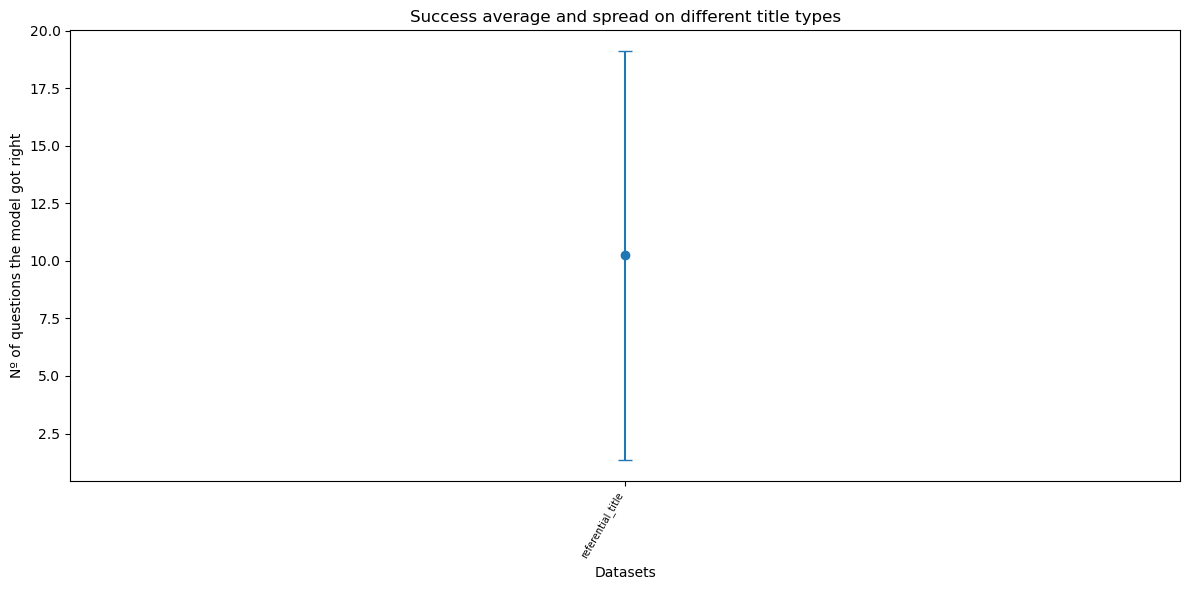

In [43]:
create_error_bar_plot(title_type_dict,"title_type_dict_avgs.png", "Success average and spread on different title types")

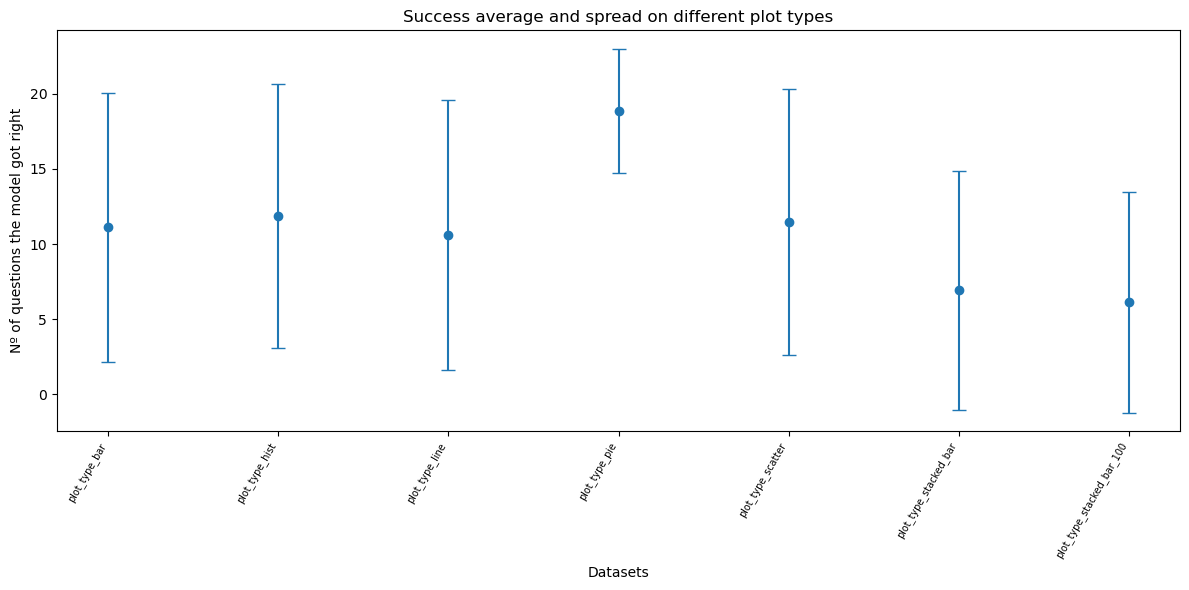

In [41]:
create_error_bar_plot(plot_type_dict,"plot_type_dict_avgs.png", "Success average and spread on different plot types")

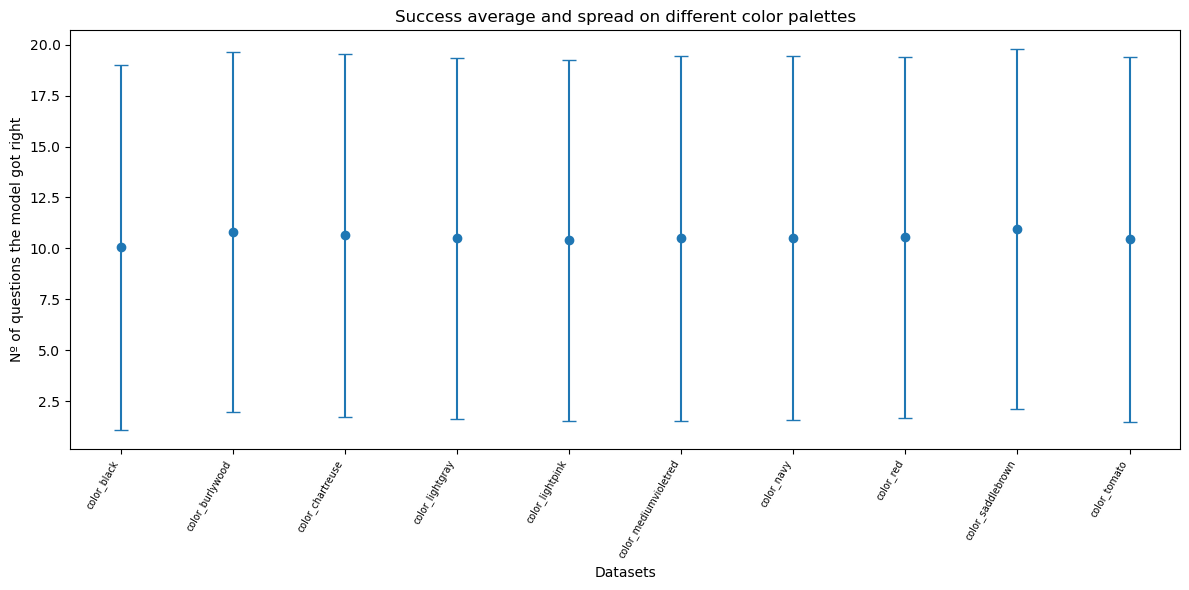

In [40]:
create_error_bar_plot(color_dict,"color_dict_avgs.png", "Success average and spread on different color palettes")

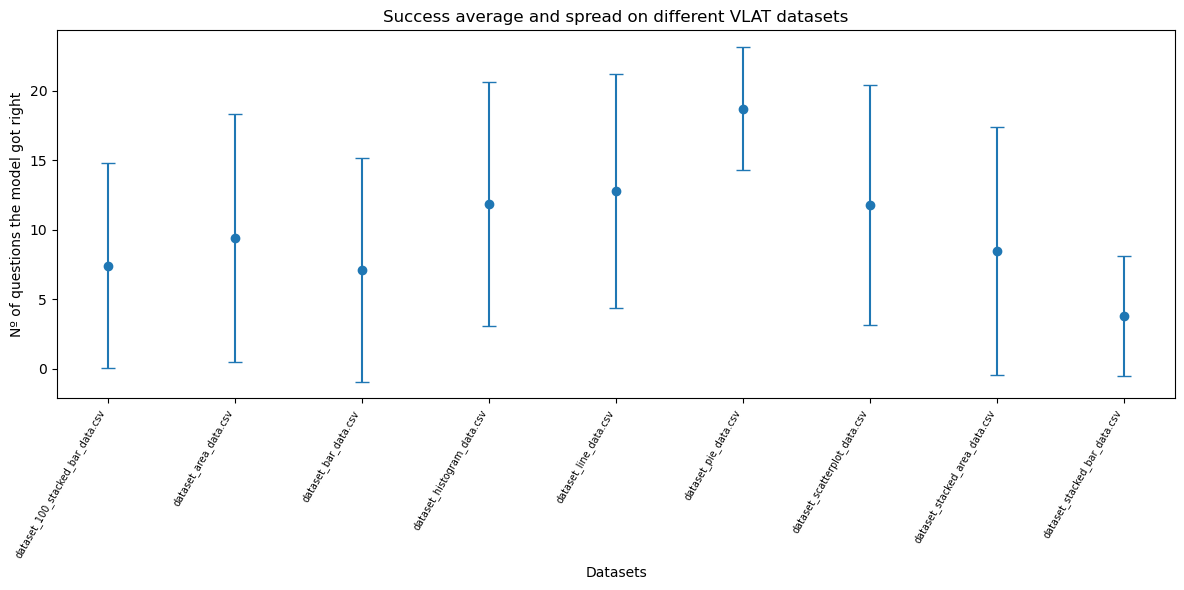

In [38]:
create_error_bar_plot(data_dict)
